<a href="https://colab.research.google.com/github/SimalGunduz/ASP.NETProje/blob/main/B%C4%B0T%C4%B0RME_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1-PRE PROCESSING**


In [ ]:
import pandas as pd
import os
from sklearn import preprocessing
import time
seconds = time.time()
%matplotlib inline

print("Bu süreç bilgisayarınızın performansına bağlı olarak 5 ila 10 dakika sürebilir.\n\n\n")
number = "0123456789"


# CSV dosya adları:,
csv_files = [
    "Monday-WorkingHours.pcap_ISCX.csv",
        "Tuesday-WorkingHours.pcap_ISCX.csv",
        "Wednesday-workingHours.pcap_ISCX.csv",
        "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
        "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
        "Friday-WorkingHours-Morning.pcap_ISCX.csv",
        "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
        "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
 ]

# Kolon başlıkları:
main_labels = [
    "Flow ID", "Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp", "Flow Duration", "Total Fwd Packets",
    "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min",
    "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std",
    "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max",
    "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
    "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std",
    "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count",
    "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "faulty-Fwd Header Length", "Fwd Avg Bytes/Bulk",
    "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes",
    "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd",
    "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label", "External IP"
]


Bu süreç bilgisayarınızın performansına bağlı olarak 5 ila 10 dakika sürebilir.





In [ ]:
main_labels2 = main_labels
main_labels = (",".join(i for i in main_labels))
main_labels = main_labels + "\n"
flag = True
for i in range(len(csv_files)):
    ths = open(str(i) + ".csv", "w")
    ths.write(main_labels)

    # Her CSV dosyasını okuma ve ön işleme
    with open('/content/drive/MyDrive/Bitirme/' + csv_files[i], 'r') as file:
        while True:
            try:
                line = file.readline()

                # CSV dosyalarının başlıklarını ve eksik satırları eleme
                if line[0] in number:

                    # "–" karakterini "-" ile değiştirme
                    if " – " in str(line):
                        line = (str(line).replace(" – ", " - "))

                    # "inf", "Infinity" ve "NaN" değerlerini sıfır ile değiştirme
                    line = (str(line).replace("inf", "0"))
                    line = (str(line).replace("Infinity", "0"))
                    line = (str(line).replace("NaN", "0"))

                    ths.write(str(line))
                else:
                    continue
            except:
                break
    ths.close()

    # Veri çerçevesi oluşturma ve eksik değerleri sıfır ile doldurma
    df = pd.read_csv(str(i) + ".csv", low_memory=False)
    df = df.fillna(0)

    string_features = ["Flow Bytes/s", "Flow Packets/s"]

    # "Flow Bytes/s" ve "Flow Packets/s" kolonlarındaki sayısal olmayan verileri düzeltme
    for ii in string_features:
        df[ii] = df[ii].replace('Infinity', -1)
        df[ii] = df[ii].replace('NaN', 0)
        number_or_not = []
        for iii in df[ii]:
            try:
                k = int(float(iii))
                number_or_not.append(int(k))
            except:
                number_or_not.append(iii)
        df[ii] = number_or_not

    string_features = []

    # Sayısal olmayan (string ve/veya kategorik) özellikleri tespit etme
    for j in main_labels2:
        if df[j].dtype == "object":
            string_features.append(j)

    # "Label" kolonunu listeden çıkarma
    try:
        string_features.remove('Label')
    except:
        print("hata!")

    labelencoder_X = preprocessing.LabelEncoder()

    # Sayısal olmayan özellikleri sayısala çevirme
    for ii in string_features:
        try:
            df[ii] = labelencoder_X.fit_transform(df[ii])
        except:
            df[ii] = df[ii].replace('Infinity', -1)

    # Gereksiz kolonu silme (61. kolon)
    df = df.drop(main_labels2[61], axis=1)

    # Tüm CSV dosyalarını tek bir dosyada birleştirme
    if flag:
        df.to_csv('all_data.csv', index=False)
        flag = False
    else:
        df.to_csv('all_data.csv', index=False, header=False, mode="a")

    os.remove(str(i) + ".csv")
    print(csv_files[i], " dosyasının ön işleme aşaması tamamlandı.\n")

print("Görev tamamlandı!")
print("Toplam işlem süresi: = ", time.time() - seconds, " saniye")

Monday-WorkingHours.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Tuesday-WorkingHours.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Wednesday-workingHours.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Friday-WorkingHours-Morning.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  dosyasının ön işleme aşaması tamamlandı.

Görev tamamlandı!
Toplam işlem süresi: =  243.09045386314392  saniye


 **2-STATISTICS**

Label
BENIGN              2203723
DoS Hulk             231073
PortScan             158930
DDoS                  41835
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1966
Infiltration             36
Heartbleed               11
Name: count, dtype: int64


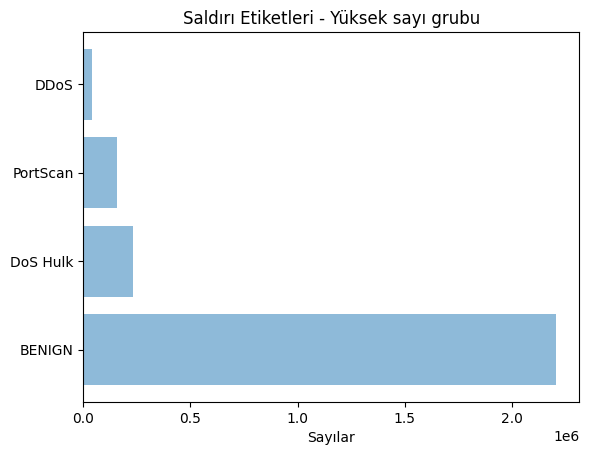

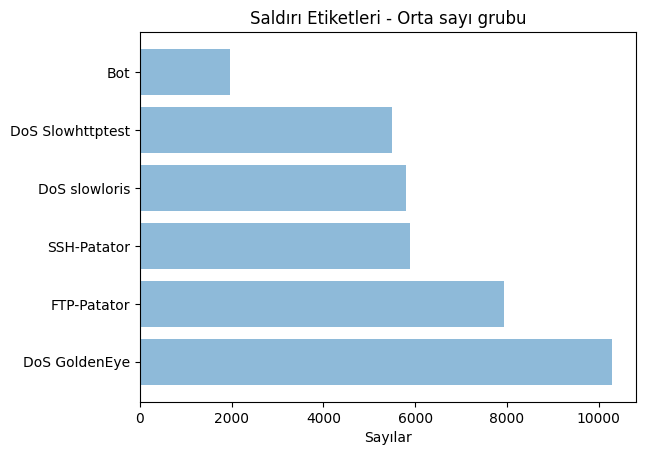

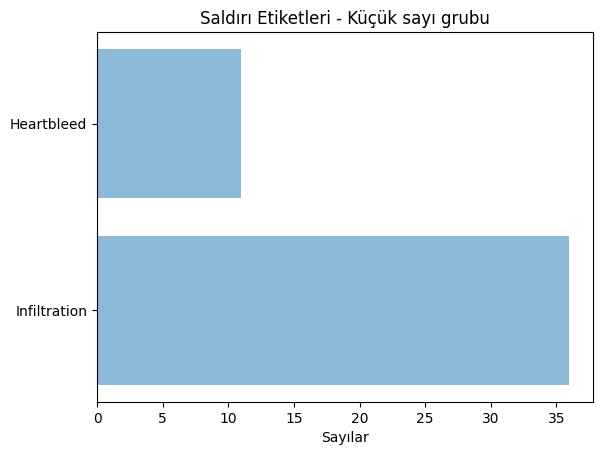

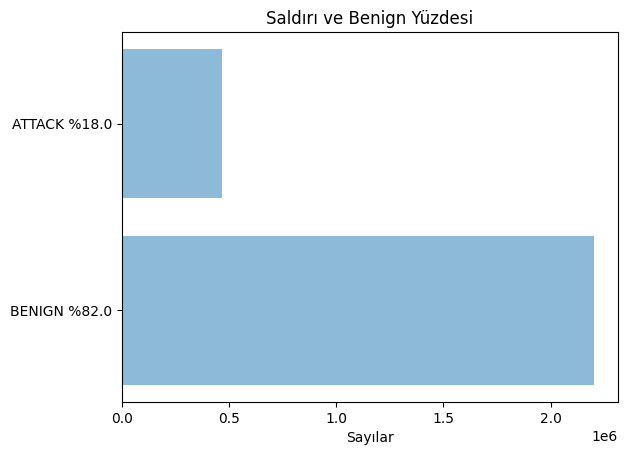

görev tamamlandı!
Toplam işlem süresi: =  21.86111569404602 saniye


In [ ]:
# programın çalışması için all_data.csv dosyası gereklidir.
# all_data.csv dosyası program ile aynı dizinde bulunmalıdır.

# bu programın amacı, veri kümesinde yer alan veriler hakkında istatistikler sağlamaktır.
# bazı verilerin çok büyük, bazılarının ise çok küçük olması göz önüne alındığında, grafikler tüm verilerin görülebilmesi için üç ayrı grupta oluşturulmuştur:
#          büyük: 11000'den fazla sayı içeren etiketler
#          orta: 600 ile 11000 arasında sayı içeren etiketler
#          küçük: 600'den az sayı içeren etiketler

# son grafiklerde, tüm saldırıların ve normal davranışların oranları verilmiştir.

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import time
seconds = time.time()

#  grafik oluşturma fonksiyonu
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()


df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())

key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attacak=0
benign=0


## Bu bölümde, saldırılar 3 grup altında toplanmıştır,
## böylece tüm değerler grafikte görülebilir.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i])
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attacak+=values[i]

key =[benign,attacak]


# Grafik oluşturma fonksiyonları çağrılır
labels=["BENIGN %"+str(round(benign/(benign+attacak),2)*100),
        "ATTACK %"+str(round(attacak/(benign+attacak),2)*100)]
graph(big_labels,big_values,"Sayılar","Saldırı Etiketleri - Yüksek sayı grubu")
graph(medium_labels,medium_values,"Sayılar","Saldırı Etiketleri - Orta sayı grubu")
graph(small_labels,small_values,"Sayılar","Saldırı Etiketleri - Küçük sayı grubu")
graph(labels,key,"Sayılar","Saldırı ve Benign Yüzdesi")

print("görev tamamlandı!")
print("Toplam işlem süresi: = ",time.time()- seconds ,"saniye")



**3-ATTACK FILTER**

In [ ]:
##  Bu programın amacı yalnızca bir tür saldırı ve normal akıştan oluşan CSV dosyaları oluşturmaktır.
##  Bu dosyalar, tüm saldırı akışlarını ve bazı normal veri akışlarını içerir. Oran: (saldırı= %30, normal=%70)
##  Normal veri akışları rastgele seçilir.

import random
import os
import pandas as pd
import time
seconds = time.time()
%matplotlib inline

def folder(f_name): # Bu fonksiyon program dizininde "attacks" adlı bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Klasör oluşturulamadı!")


print("Bu işlem, bilgisayarınızın performansına bağlı olarak 3 ila 8 dakika sürebilir.\n\n\n")

# Sütun başlıkları
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]
main_labels=( ",".join( i for i in main_labels ) )

attacks=["BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack – Brute Force", "Web Attack – Sql Injection", "Web Attack – XSS"]
folder("./attacks/")

benign=2359289

dict_attack={
"Bot":1966,
"DDoS":41835,
"DoS GoldenEye":10293,
"DoS Hulk":231073,
"DoS Slowhttptest":5499,
"DoS slowloris":5796,
"FTP-Patator":7938,
"Heartbleed":11,
"Infiltration":36,
"PortScan":158930,
"SSH-Patator":5897,
"Web Attack - Brute Force":1507,
"Web Attack - XSS":652,
"Web Attack - Sql Injection":21}



for i in dict_attack: # Bu bölümde her saldırı türü için bir dosya açılır ve rastgele bir normal akış kaydedilir.
    a,b=0,0
    ths = open("./attacks/"+i + ".csv", "w")
    ths.write(str(main_labels)+"\n")
    benign_num=int(benign/(dict_attack[i]*(7/3)))
    with open("all_data.csv", "r") as file:
        while True:
            try:
                line=file.readline()
                line=line[:-1]
                k=line.split(",")
                if k[83]=="BENIGN":
                    rnd=random.randint(1,benign_num)
                    if rnd==1:
                            ths.write(str(line)+"\n")
                            b+=1
                if  k[83]==i:
                    ths.write(str(line)+"\n")
                    a+=1
                else:
                    continue
            except:
                break
    ths.close()
    print(i ,"dosyası tamamlandı\n saldırı:%d\n normal:%d\n\n\n " %(a,b))


## Tüm web saldırı dosyaları tek bir dosyada birleştirilir.
webs=["Web Attack - Brute Force","Web Attack - XSS","Web Attack - Sql Injection"]
flag=True
for i in webs:
    df=pd.read_csv("./attacks/"+str(i)+".csv")
    if flag:
        df.to_csv('./attacks/Web Attack.csv' ,index = False)
        flag=False
    else:
        df.to_csv('./attacks/Web Attack.csv' ,index = False,header=False,mode="a")
    os.remove("./attacks/"+str(i)+".csv")


print("Görev tamamlandı!")
print("İşlem süresi: = ",time.time()- seconds ,"saniye")


Bu işlem, bilgisayarınızın performansına bağlı olarak 3 ila 8 dakika sürebilir.



Bot dosyası tamamlandı
 saldırı:1966
 normal:4341


 
DDoS dosyası tamamlandı
 saldırı:41835
 normal:91730


 
DoS GoldenEye dosyası tamamlandı
 saldırı:10293
 normal:22319


 
DoS Hulk dosyası tamamlandı
 saldırı:231073
 normal:550974


 
DoS Slowhttptest dosyası tamamlandı
 saldırı:5499
 normal:11928


 
DoS slowloris dosyası tamamlandı
 saldırı:5796
 normal:12539


 
FTP-Patator dosyası tamamlandı
 saldırı:7938
 normal:17352


 
Heartbleed dosyası tamamlandı
 saldırı:11
 normal:25


 
Infiltration dosyası tamamlandı
 saldırı:36
 normal:83


 
PortScan dosyası tamamlandı
 saldırı:158930
 normal:366623


 
SSH-Patator dosyası tamamlandı
 saldırı:5897
 normal:12596


 
Web Attack - Brute Force dosyası tamamlandı
 saldırı:0
 normal:3339


 
Web Attack - XSS dosyası tamamlandı
 saldırı:0
 normal:1478


 
Web Attack - Sql Injection dosyası tamamlandı
 saldırı:0
 normal:38


 
Görev tamamlandı!
İşlem süresi:

**4-Saldırı Dosyaları İçin Özellik Seçimi**

SSH-Patator önem listesi:
SSH-Patator 
                              importance
Features                               
Fwd Packet Length Max          0.000877
Flow Duration                  0.000617
Flow IAT Max                   0.000544
Flow IAT Mean                  0.000509
Flow Packets/s                 0.000441
Flow IAT Min                   0.000431
Fwd IAT Total                  0.000320
Total Length of Fwd Packets    0.000286
Flow Bytes/s                   0.000255
Total Backward Packets         0.000219
Flow IAT Std                   0.000199
Fwd Packet Length Mean         0.000183
Fwd Packet Length Std          0.000119
Bwd Packet Length Mean         0.000065
Total Fwd Packets              0.000045
Bwd Packet Length Max          0.000039
Bwd Packet Length Std          0.000030
Total Length of Bwd Packets    0.000028
Fwd Packet Length Min          0.000025
Bwd Packet Length Min          0.000008 



SSH-Patator=["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Flow IA

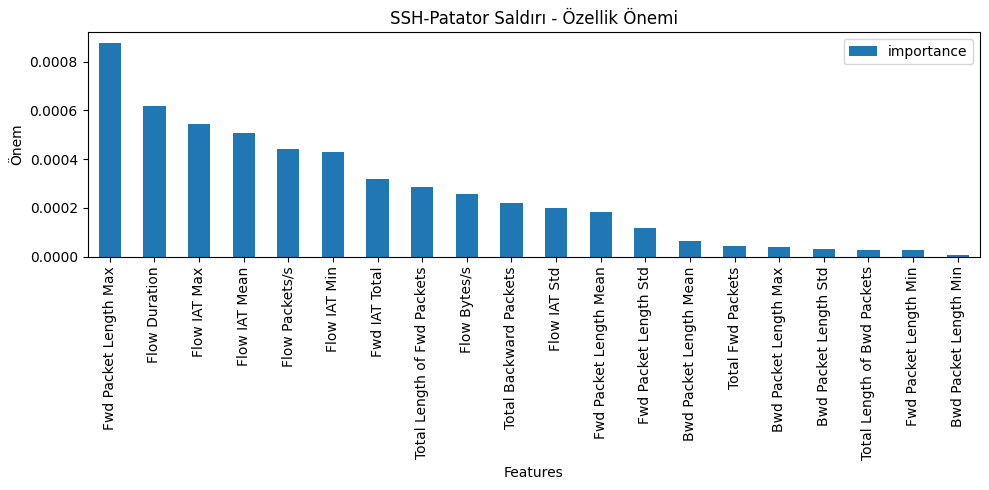

-----------------------------------------------------------------------------------------------




DoS slowloris önem listesi:
DoS slowloris 
                              importance
Features                               
Flow IAT Mean                  0.483181
Total Length of Bwd Packets    0.066135
Bwd Packet Length Mean         0.040469
Total Fwd Packets              0.020967
Flow IAT Min                   0.004273
Flow Bytes/s                   0.002165
Fwd Packet Length Std          0.001537
Fwd IAT Total                  0.001343
Fwd Packet Length Max          0.001237
Flow Duration                  0.000820
Flow IAT Max                   0.000809
Total Length of Fwd Packets    0.000703
Bwd Packet Length Std          0.000613
Fwd Packet Length Mean         0.000608
Flow IAT Std                   0.000540
Bwd Packet Length Max          0.000526
Flow Packets/s                 0.000469
Total Backward Packets         0.000320
Fwd Packet Length Min          0.000193
Bwd Packet Lengt

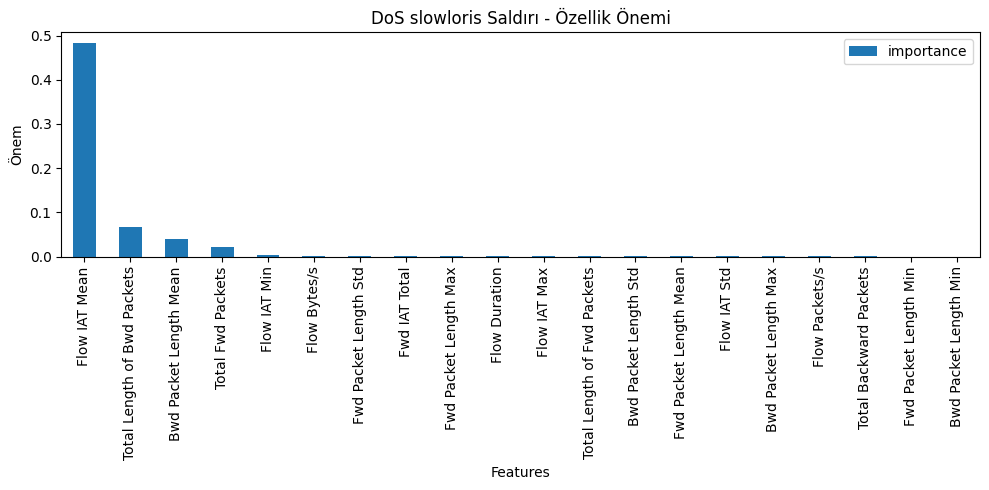

-----------------------------------------------------------------------------------------------




DoS GoldenEye önem listesi:
DoS GoldenEye 
                              importance
Features                               
Flow IAT Max                   0.543614
Total Backward Packets         0.036212
Flow IAT Min                   0.016565
Bwd Packet Length Std          0.003339
Flow Bytes/s                   0.001362
Bwd Packet Length Mean         0.001270
Fwd Packet Length Max          0.001125
Fwd IAT Total                  0.001108
Flow Duration                  0.001043
Flow Packets/s                 0.000658
Bwd Packet Length Max          0.000538
Flow IAT Mean                  0.000280
Total Length of Bwd Packets    0.000263
Fwd Packet Length Min          0.000174
Total Length of Fwd Packets    0.000168
Bwd Packet Length Min          0.000107
Fwd Packet Length Mean         0.000076
Flow IAT Std                   0.000023
Fwd Packet Length Std          0.000016
Total Fwd Packet

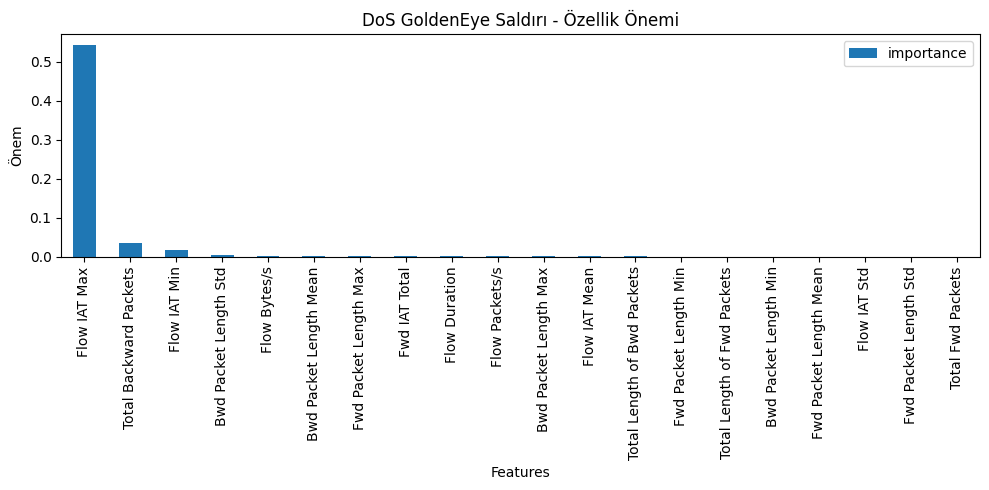

-----------------------------------------------------------------------------------------------




Bot önem listesi:
Bot 
                              importance
Features                               
Bwd Packet Length Mean         0.358717
Flow IAT Std                   0.009817
Flow IAT Mean                  0.008744
Flow Duration                  0.007955
Flow IAT Min                   0.005907
Flow IAT Max                   0.003808
Flow Bytes/s                   0.000929
Flow Packets/s                 0.000685
Fwd IAT Total                  0.000387
Total Backward Packets         0.000362
Bwd Packet Length Max          0.000125
Total Length of Bwd Packets    0.000100
Fwd Packet Length Std          0.000061
Total Fwd Packets              0.000057
Fwd Packet Length Mean         0.000056
Fwd Packet Length Max          0.000044
Bwd Packet Length Std          0.000034
Total Length of Fwd Packets    0.000031
Fwd Packet Length Min          0.000021
Bwd Packet Length Min          0.000

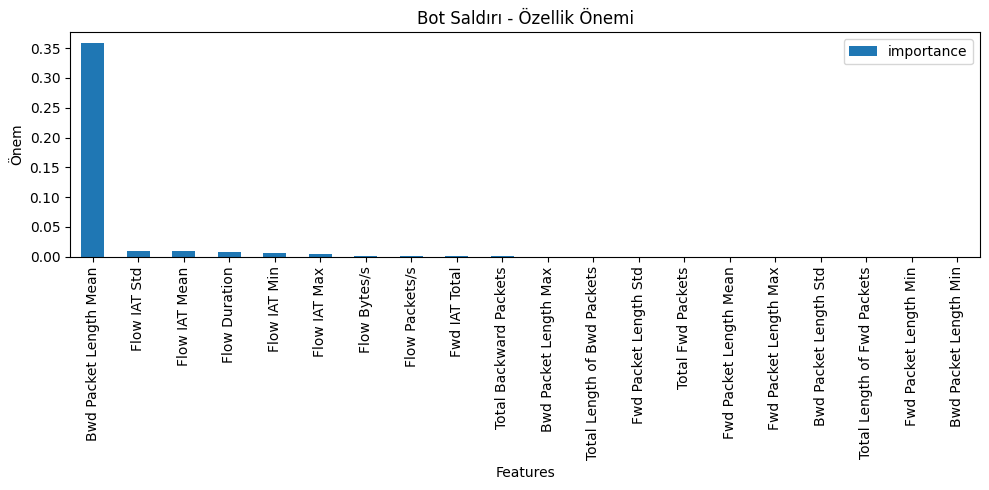

-----------------------------------------------------------------------------------------------




DoS Hulk önem listesi:
DoS Hulk 
                                importance
Features                                 
Bwd Packet Length Std        5.083050e-01
Fwd Packet Length Std        7.737300e-02
Flow IAT Min                 1.499481e-03
Flow Duration                1.487945e-03
Fwd Packet Length Max        1.157034e-03
Total Backward Packets       3.468504e-04
Total Length of Bwd Packets  1.942645e-04
Fwd IAT Total                1.725996e-04
Flow IAT Max                 1.582644e-04
Flow IAT Mean                1.166145e-04
Flow IAT Std                 7.627635e-05
Flow Packets/s               7.624884e-05
Bwd Packet Length Mean       3.908243e-05
Flow Bytes/s                 2.801868e-05
Bwd Packet Length Max        1.579834e-05
Total Fwd Packets            1.413705e-05
Bwd Packet Length Min        1.021962e-05
Fwd Packet Length Mean       8.424584e-06
Total Length of Fwd Packet

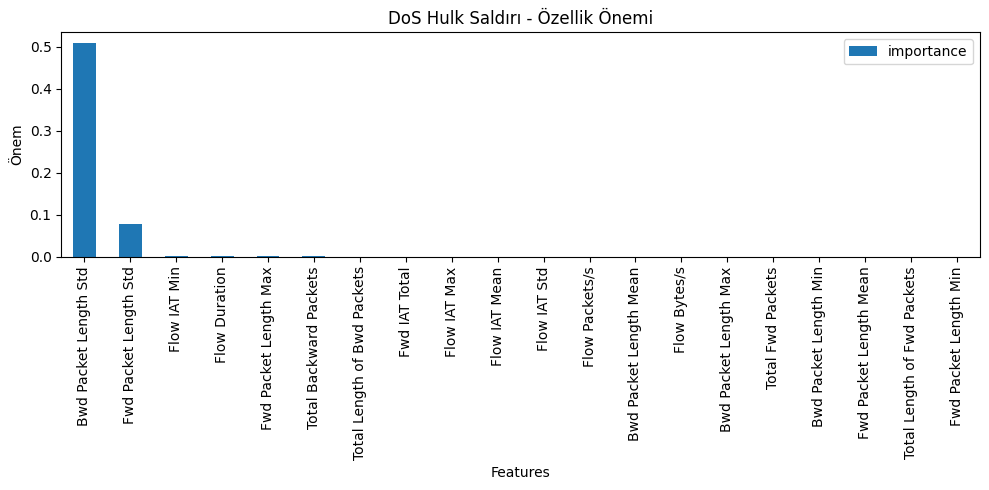

-----------------------------------------------------------------------------------------------




Heartbleed önem listesi:
Heartbleed 
                              importance
Features                               
Bwd Packet Length Mean            0.052
Bwd Packet Length Max             0.048
Total Backward Packets            0.048
Total Length of Bwd Packets       0.044
Total Fwd Packets                 0.040
Flow IAT Min                      0.036
Total Length of Fwd Packets       0.032
Bwd Packet Length Std             0.032
Flow Duration                     0.020
Fwd IAT Total                     0.020
Fwd Packet Length Max             0.008
Flow IAT Max                      0.004
Fwd Packet Length Std             0.000
Fwd Packet Length Mean            0.000
Fwd Packet Length Min             0.000
Flow Bytes/s                      0.000
Flow Packets/s                    0.000
Flow IAT Mean                     0.000
Flow IAT Std                      0.000
Bwd Packet Length Min 

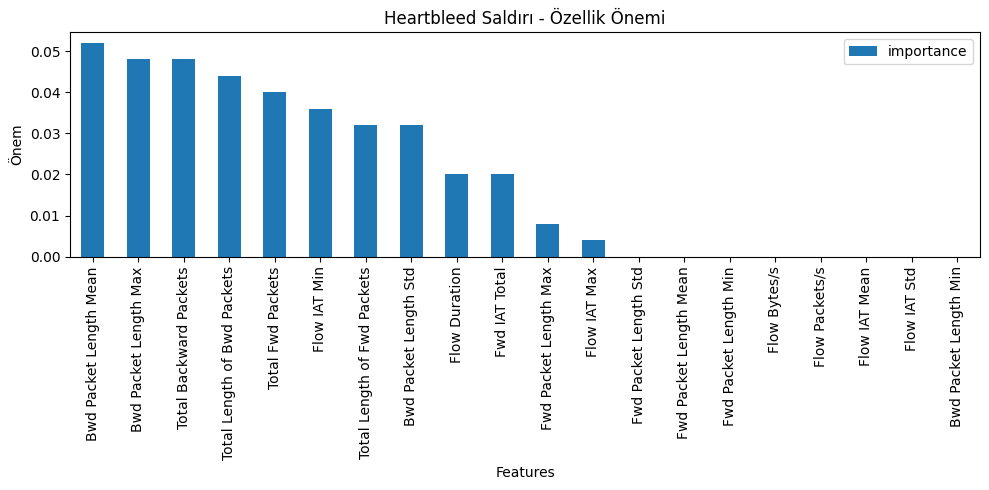

-----------------------------------------------------------------------------------------------




DoS Slowhttptest önem listesi:
DoS Slowhttptest 
                              importance
Features                               
Flow IAT Mean                  0.650468
Fwd Packet Length Min          0.104517
Bwd Packet Length Max          0.015823
Total Length of Bwd Packets    0.014986
Bwd Packet Length Mean         0.013497
Fwd Packet Length Mean         0.004201
Fwd Packet Length Std          0.002493
Bwd Packet Length Std          0.002260
Fwd Packet Length Max          0.001982
Flow IAT Min                   0.001978
Total Length of Fwd Packets    0.001632
Flow Bytes/s                   0.001078
Total Backward Packets         0.000687
Bwd Packet Length Min          0.000387
Flow Duration                  0.000384
Fwd IAT Total                  0.000314
Flow IAT Max                   0.000299
Total Fwd Packets              0.000261
Flow IAT Std                   0.000134
Flow Packe

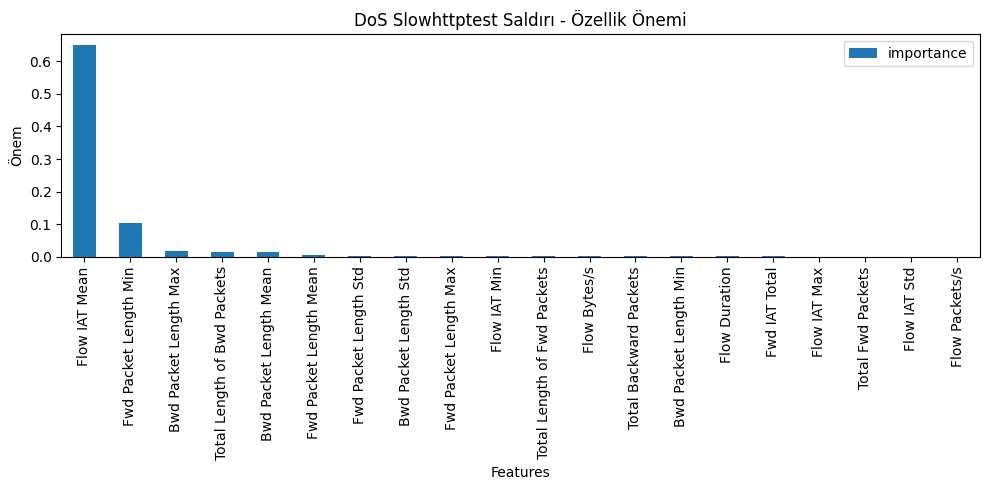

-----------------------------------------------------------------------------------------------




Web Attack önem listesi:
Web Attack 
                              importance
Features                               
Flow Duration                       0.0
Total Fwd Packets                   0.0
Flow IAT Min                        0.0
Flow IAT Max                        0.0
Flow IAT Std                        0.0
Flow IAT Mean                       0.0
Flow Packets/s                      0.0
Flow Bytes/s                        0.0
Bwd Packet Length Std               0.0
Bwd Packet Length Mean              0.0
Bwd Packet Length Min               0.0
Bwd Packet Length Max               0.0
Fwd Packet Length Std               0.0
Fwd Packet Length Mean              0.0
Fwd Packet Length Min               0.0
Fwd Packet Length Max               0.0
Total Length of Bwd Packets         0.0
Total Length of Fwd Packets         0.0
Total Backward Packets              0.0
Fwd IAT Total         

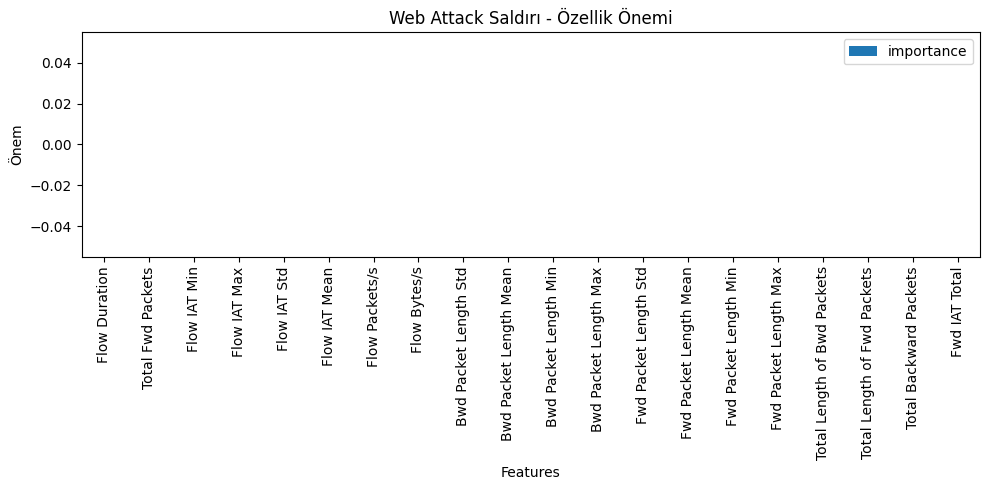

-----------------------------------------------------------------------------------------------




DDoS önem listesi:
DDoS 
                              importance
Features                               
Bwd Packet Length Std          0.466045
Total Backward Packets         0.098034
Fwd IAT Total                  0.012165
Flow IAT Min                   0.006109
Flow Duration                  0.005919
Flow IAT Std                   0.005621
Flow IAT Mean                  0.005236
Flow IAT Max                   0.004691
Flow Bytes/s                   0.004106
Fwd Packet Length Max          0.003369
Total Length of Fwd Packets    0.003052
Fwd Packet Length Mean         0.001502
Flow Packets/s                 0.001002
Bwd Packet Length Max          0.000593
Fwd Packet Length Std          0.000588
Bwd Packet Length Min          0.000519
Bwd Packet Length Mean         0.000215
Total Length of Bwd Packets    0.000091
Total Fwd Packets              0.000040
Fwd Packet Length Min          0.0

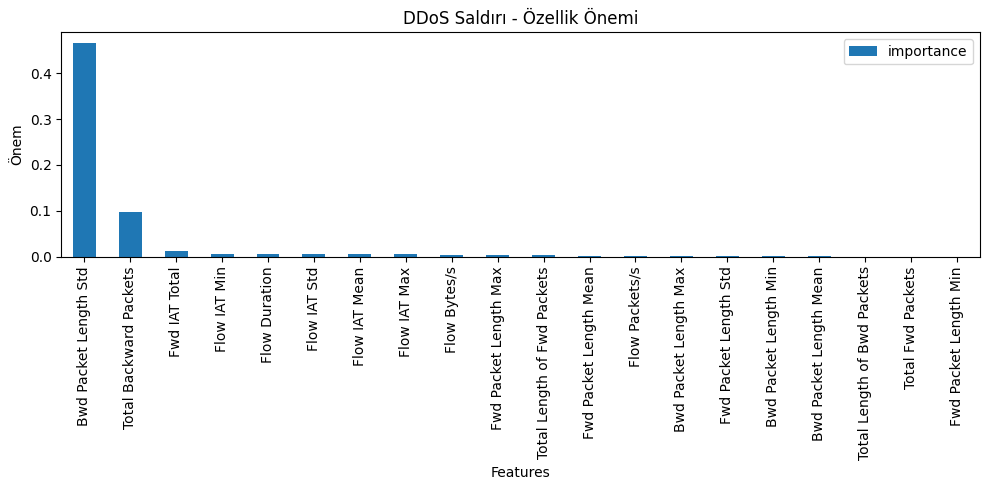

-----------------------------------------------------------------------------------------------




PortScan önem listesi:
PortScan 
                                importance
Features                                 
Total Length of Fwd Packets  3.077781e-01
Flow Bytes/s                 3.058763e-01
Flow Duration                8.093478e-04
Fwd IAT Total                6.152388e-04
Flow IAT Mean                2.254947e-04
Flow IAT Max                 2.146710e-04
Fwd Packet Length Max        1.736497e-04
Bwd Packet Length Min        5.498762e-05
Total Length of Bwd Packets  5.168304e-05
Bwd Packet Length Mean       4.202281e-05
Flow Packets/s               4.133529e-05
Bwd Packet Length Max        3.272550e-05
Flow IAT Min                 2.311287e-05
Bwd Packet Length Std        1.894657e-05
Total Backward Packets       1.098830e-05
Fwd Packet Length Mean       1.049554e-05
Flow IAT Std                 1.047750e-05
Total Fwd Packets            1.018572e-05
Fwd Packet Length Std     

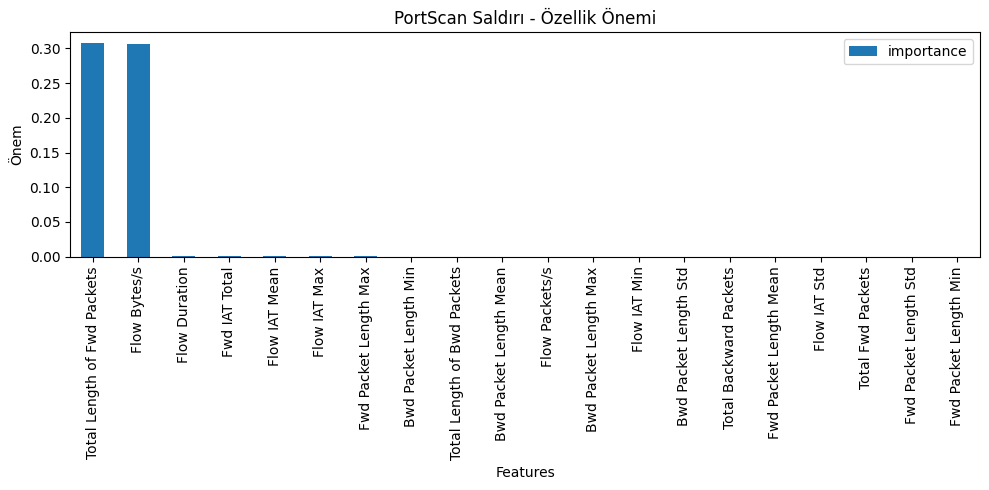

-----------------------------------------------------------------------------------------------




FTP-Patator önem listesi:
FTP-Patator 
                              importance
Features                               
Fwd Packet Length Max          0.109221
Fwd Packet Length Std          0.100776
Fwd Packet Length Mean         0.016823
Bwd Packet Length Mean         0.000641
Bwd Packet Length Std          0.000441
Bwd Packet Length Max          0.000441
Total Length of Bwd Packets    0.000346
Flow IAT Min                   0.000211
Total Fwd Packets              0.000133
Flow Duration                  0.000121
Fwd IAT Total                  0.000113
Total Length of Fwd Packets    0.000110
Flow IAT Mean                  0.000109
Flow IAT Max                   0.000101
Flow Packets/s                 0.000098
Fwd Packet Length Min          0.000088
Total Backward Packets         0.000079
Flow Bytes/s                   0.000041
Flow IAT Std                   0.000038
Bwd Packet Length Mi

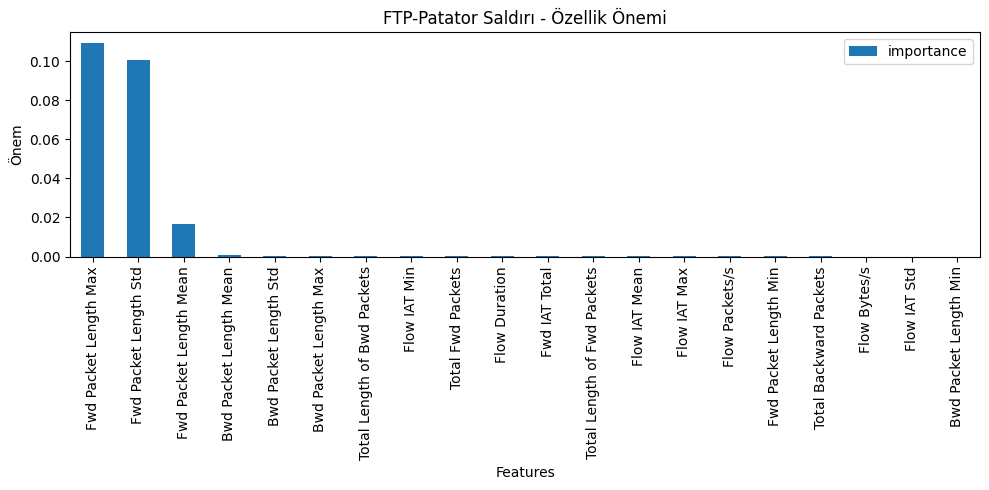

-----------------------------------------------------------------------------------------------




Infiltration önem listesi:
Infiltration 
                              importance
Features                               
Fwd Packet Length Mean         0.296782
Total Length of Fwd Packets    0.068632
Flow IAT Std                   0.009614
Flow IAT Min                   0.008758
Fwd Packet Length Max          0.008695
Flow Bytes/s                   0.007960
Flow IAT Mean                  0.005003
Flow Duration                  0.004021
Fwd IAT Total                  0.003799
Flow IAT Max                   0.003698
Flow Packets/s                 0.002368
Bwd Packet Length Mean         0.002320
Total Backward Packets         0.002296
Bwd Packet Length Max          0.002248
Fwd Packet Length Std          0.001906
Total Fwd Packets              0.001671
Bwd Packet Length Std          0.001643
Total Length of Bwd Packets    0.001094
Bwd Packet Length Min          0.000607
Fwd Packet Length 

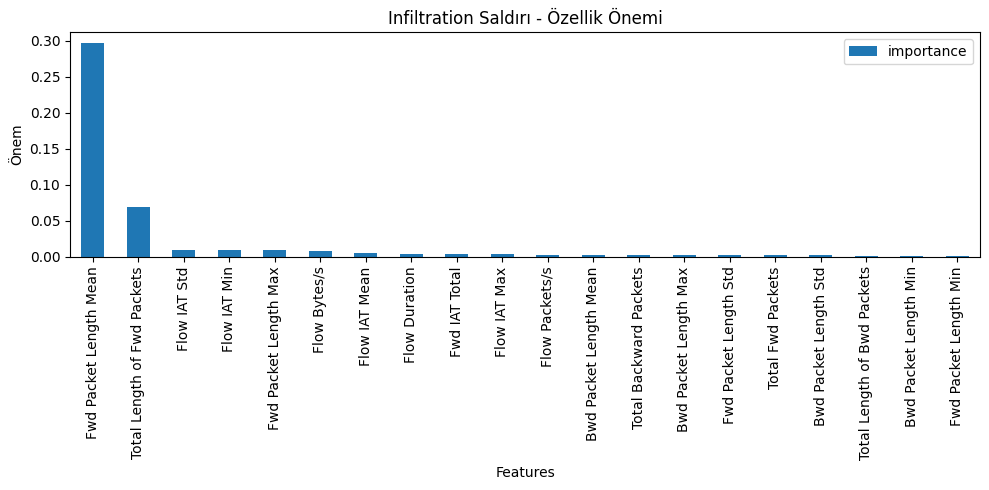

-----------------------------------------------------------------------------------------------




Görev tamamlandı!
Toplam işlem süresi: = 7654.826755285263 saniye


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): # bu fonksiyon program dizininde "feaure_pics" adında bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Klasör oluşturulamadı!")


# CSV dosyalarının isimleri:
csv_files=os.listdir("/content/attacks") # "attacks" klasöründeki dosya isimlerinin bir listesini oluşturur.

# Sütunların başlıkları
main_labels=["Flow Duration","Total Fwd Packets", "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_for_attack_files.csv", "w")
folder("/content/feaure_pics/")
for j in csv_files:
    df=pd.read_csv("/content/attacks/"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: # makine öğrenimi algoritmasında kullanmak için normal etiketi "1", saldırı etiketi "0" olarak değiştirilir
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values

    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0


    # özellik önem derecelerinin hesaplanması
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar()
    # özellik önem derecelerinin yazdırılması
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break
    print(j[0:-4],"önem listesi:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Saldırı - Özellik Önemi")
    plt.ylabel('Önem')
    plt.savefig("/content/feaure_pics/"+j[0:-4]+".pdf", bbox_inches='tight', format='pdf')
    ths.write((fea_ture))
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")


print("Görev tamamlandı!")
print("Toplam işlem süresi: =", time.time()-seconds ,"saniye")
ths.close()


In [ ]:
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
forest =sk.ensemble.RandomForestRegressor(n_estimators=250, random_state=0, n_jobs=-1)


all_data önem listesi:
all_data 
                              importance
Features                               
Bwd Packet Length Std          0.249084
Flow Bytes/s                   0.174511
Total Length of Fwd Packets    0.104885
Fwd Packet Length Std          0.062895
Fwd IAT Total                  0.010082
Flow IAT Std                   0.007859
Flow IAT Min                   0.007584
Flow IAT Mean                  0.005986
Flow Duration                  0.005685
Flow IAT Max                   0.003489
Bwd Packet Length Max          0.003214
Fwd Packet Length Max          0.002066
Flow Packets/s                 0.001517
Total Length of Bwd Packets    0.001380
Bwd Packet Length Mean         0.000778
Fwd Packet Length Min          0.000561
Fwd Packet Length Mean         0.000400
Total Backward Packets         0.000230
Total Fwd Packets              0.000181
Bwd Packet Length Min          0.000078 



all_data=["Bwd Packet Length Std","Flow Bytes/s","Total Length of Fwd Packets","Fw

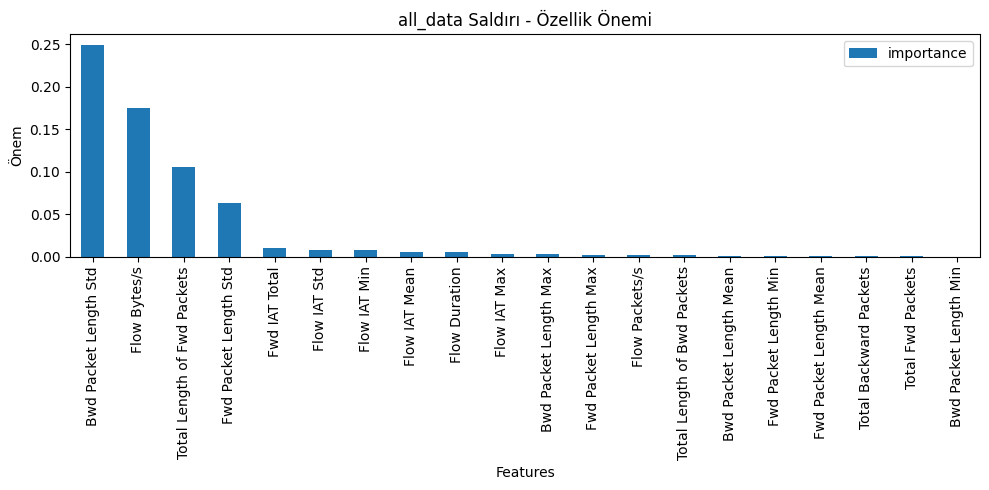

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
import sklearn as sk
import time

seconds = time.time()

def folder(f_name): # Bu fonksiyon program dizininde "feature_pics" adlı bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

# CSV dosyalarının isimleri:
csv_files = ["all_data.csv"] # "attacks" klasöründeki dosya isimlerinden bir liste oluşturur.

# Sütun başlıkları
main_labels = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max", "Fwd Packet Length Min",
   "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std",
   "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max",
   "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags", "Fwd URG Flags", "Bwd URG Flags",
   "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length", "Packet Length Mean", "Packet Length Std",
   "Packet Length Variance", "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count",
   "ECE Flag Count", "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes",
   "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd",
   "min_seg_size_forward", "Active Mean", "Active Std", "Active Max", "Active Min",
   "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"]

ths = open("importance_list_all_data.csv", "w")
folder("./feature_pics/")
for j in csv_files:
    df = pd.read_csv(j, usecols=main_labels)
    df = df.sample(frac=0.1, random_state=1)  # Veri kümesinin %10'unu örnekleme
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]: # Makine öğrenme algoritmasında kullanmak için normal etiketi "1", saldırı etiketi "0" olarak değiştirilir.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values

    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0

    # Özellik önemlerinin hesaplanması
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250, random_state=0, n_jobs=-1)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol = list(df.columns.values)
    impor_bars = pd.DataFrame({'Features': refclasscol[0:20], 'importance': importances[0:20]})
    impor_bars = impor_bars.sort_values('importance', ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar()
    # Özellik önemlerinin yazdırılması
    count = 0
    fea_ture = j[0:-4] + "=["
    for i in impor_bars.index:
        fea_ture = fea_ture + "\"" + str(i) + "\","
        count += 1
        if count == 5:
            fea_ture = fea_ture[0:-1] + "]"
            break
    print(j[0:-4], "önem listesi:")
    print(j[0:-4], "\n", impor_bars.head(20), "\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4] + " Saldırı - Özellik Önemi")
    plt.ylabel('Önem')
    plt.savefig("./feature_pics/" + j[0:-4] + ".pdf", bbox_inches='tight', format='pdf')
    ths.write((fea_ture))
    plt.tight_layout()
    # plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print("görev tamamlandı!")
print("Toplam işlem süresi: = ", (time.time() - seconds) / 60, "dakika")
ths.close()


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.43            0.68            0.57            0.39            0.0343         
SSH-Patator       ID3                0.96            0.95            0.97            0.96            0.0641         
SSH-Patator       MLP                0.88            0.87            0.87            0.87            1.3575         


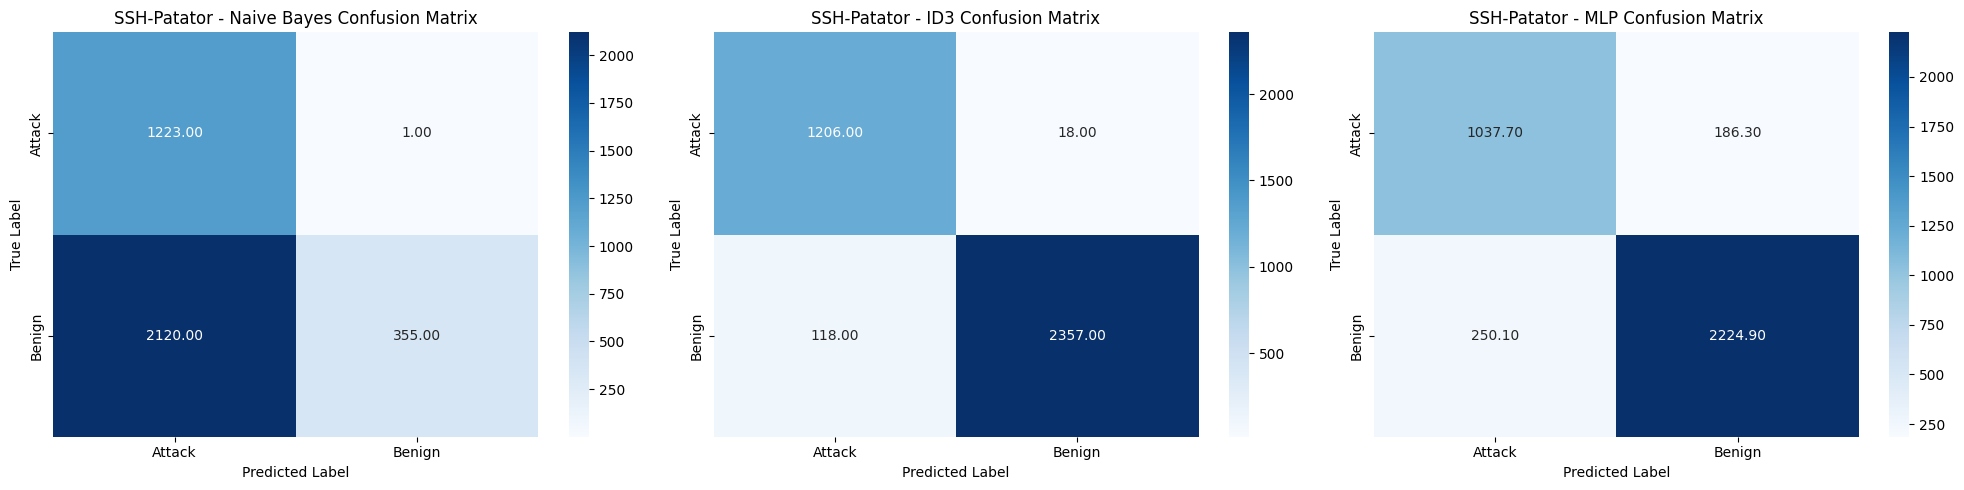

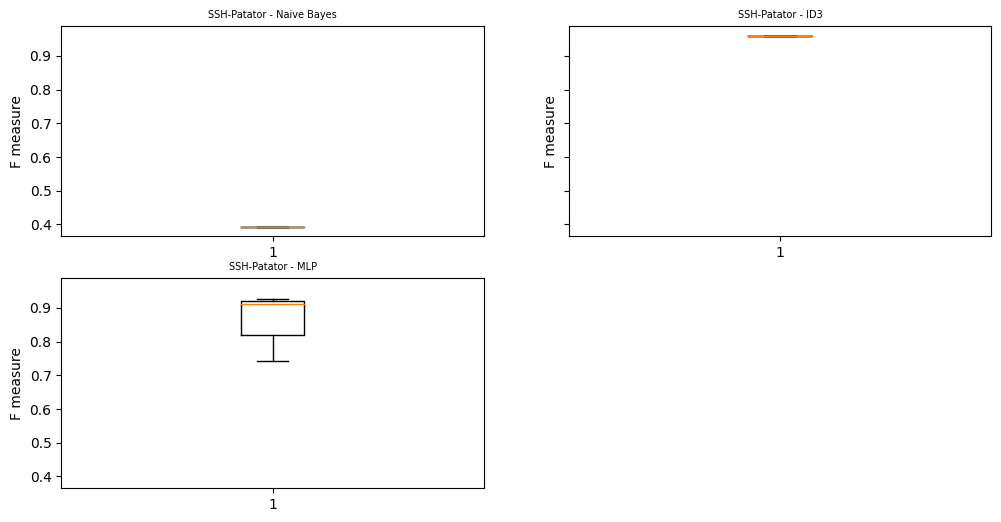


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.45            0.69            0.59            0.42            0.0209         
DoS slowloris     ID3                0.96            0.97            0.94            0.95            0.0434         
DoS slowloris     MLP                0.77            0.74            0.73            0.68            2.6625         


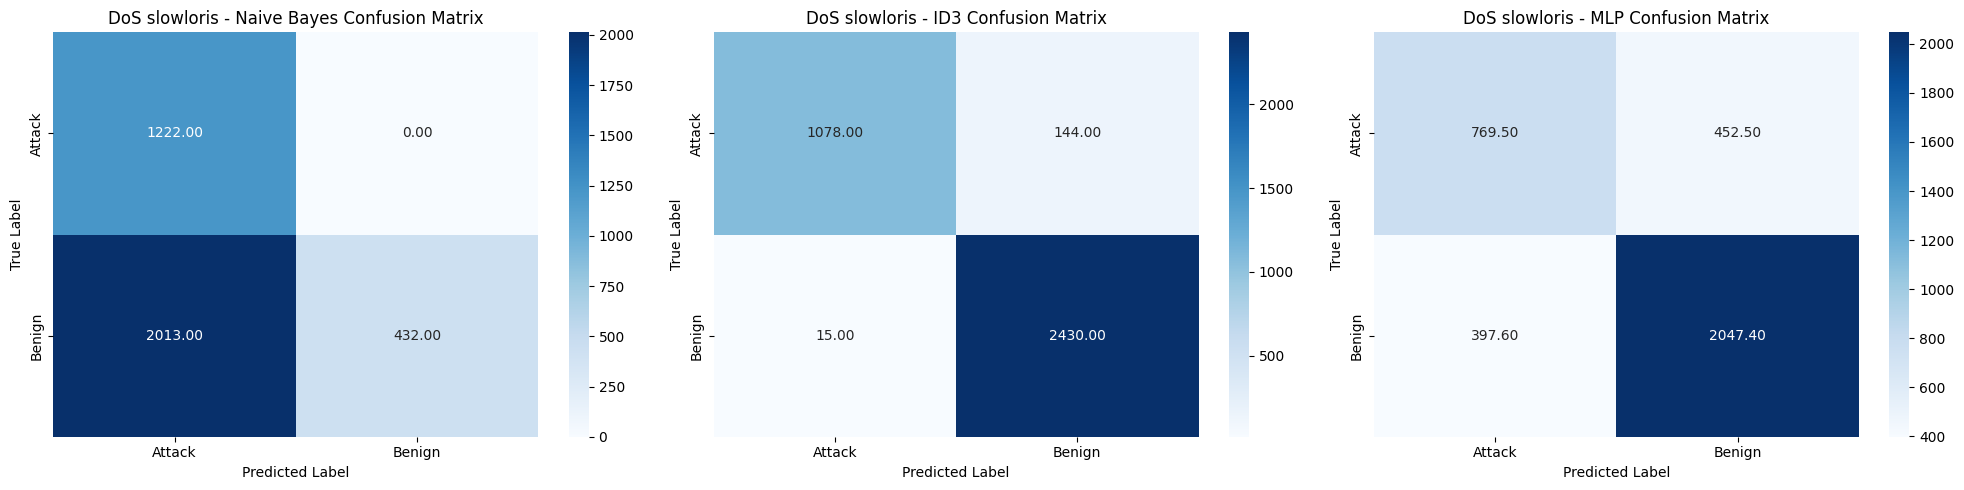

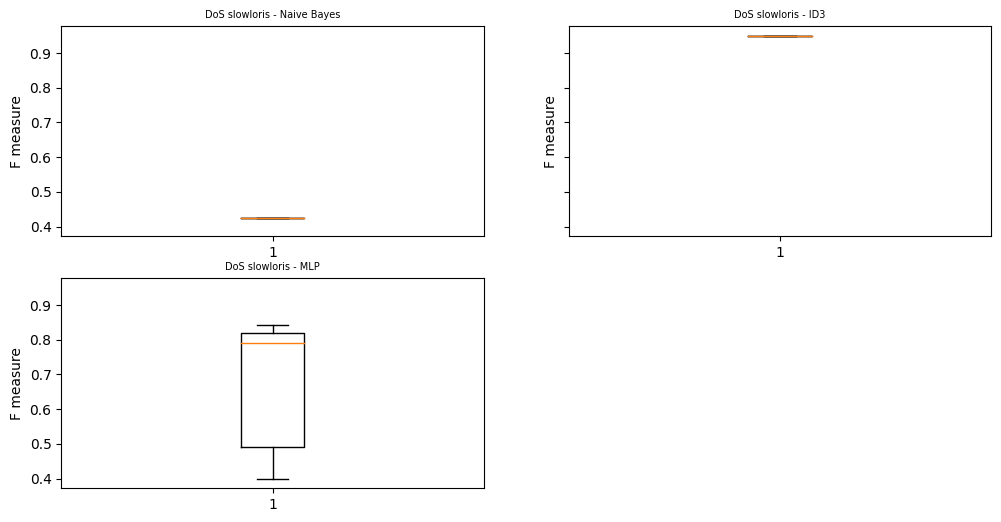


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.81            0.82            0.74            0.76            0.0422         
DoS GoldenEye     ID3                0.99            0.99            0.99            0.99            0.0872         
DoS GoldenEye     MLP                0.7             0.71            0.72            0.67            5.352          


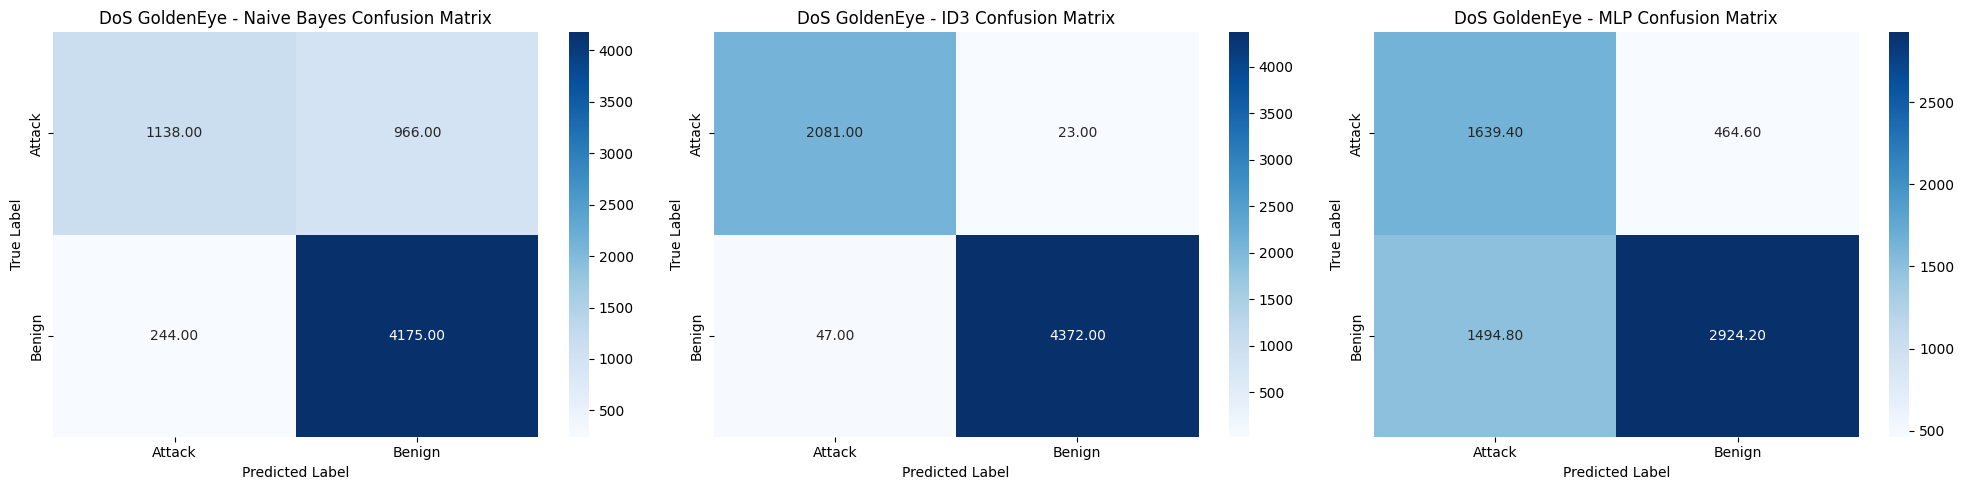

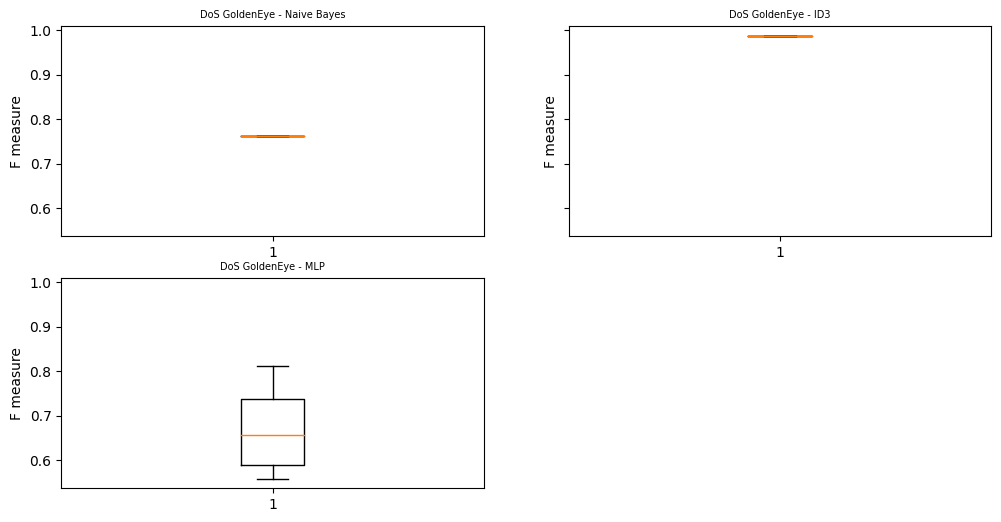


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.55            0.7             0.67            0.55            0.0141         
Bot               ID3                0.96            0.94            0.97            0.95            0.0194         
Bot               MLP                0.67            0.59            0.57            0.57            0.4935         


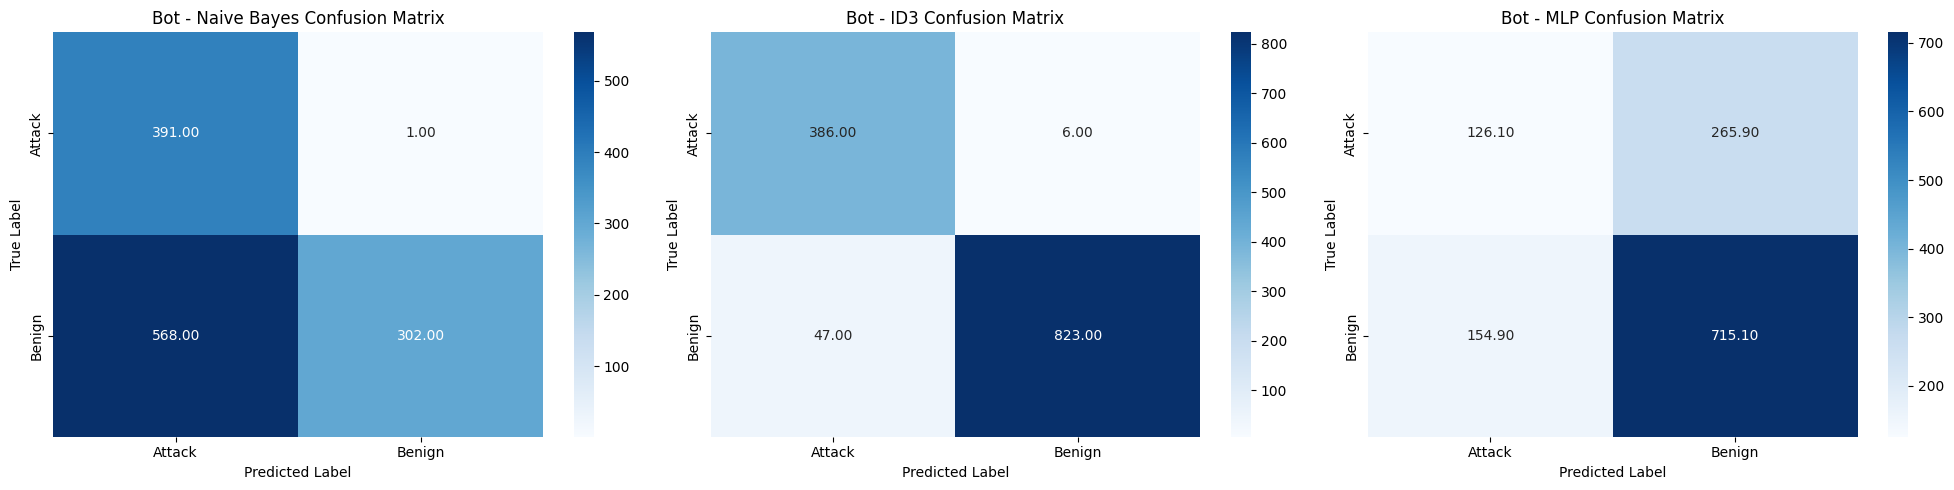

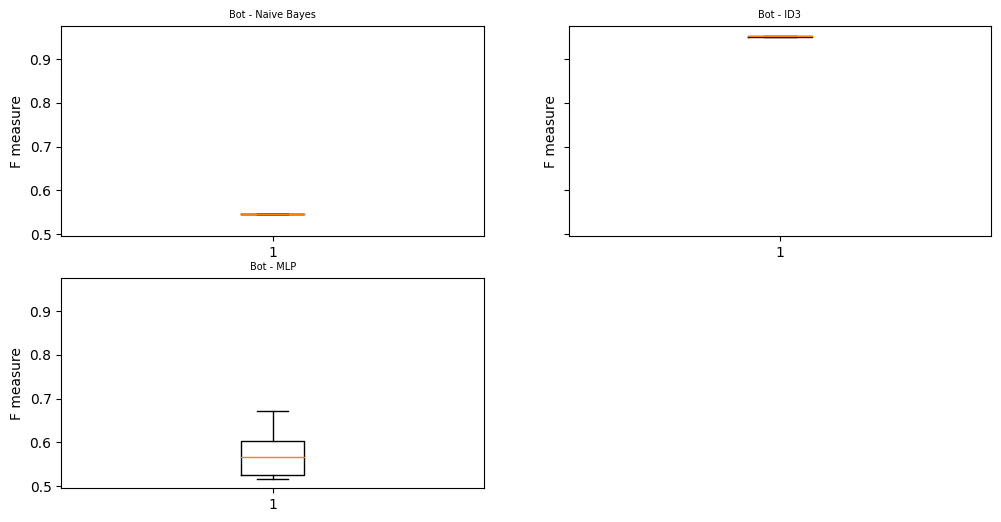


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.35            0.66            0.54            0.31            0.6594         
DoS Hulk          ID3                0.96            0.95            0.96            0.95            1.9573         
DoS Hulk          MLP                0.95            0.95            0.94            0.94            103.5201       


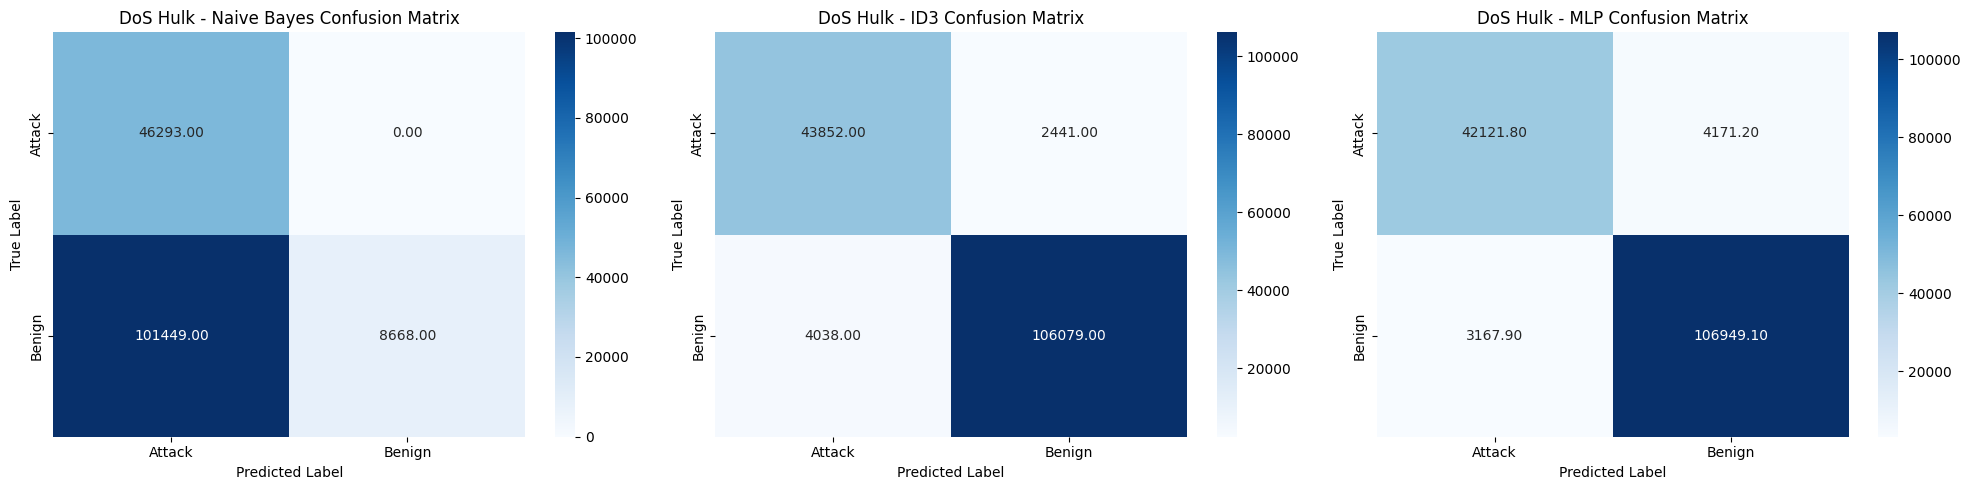

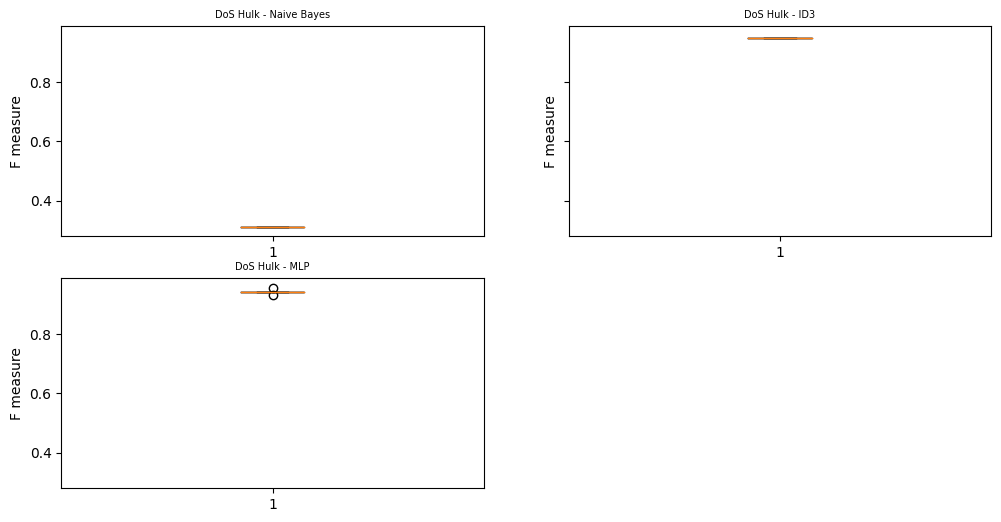


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Heartbleed        Naive Bayes        1.0             1.0             1.0             1.0             0.0119         
Heartbleed        ID3                1.0             1.0             1.0             1.0             0.0114         
Heartbleed        MLP                0.78            0.73            0.79            0.69            0.115          


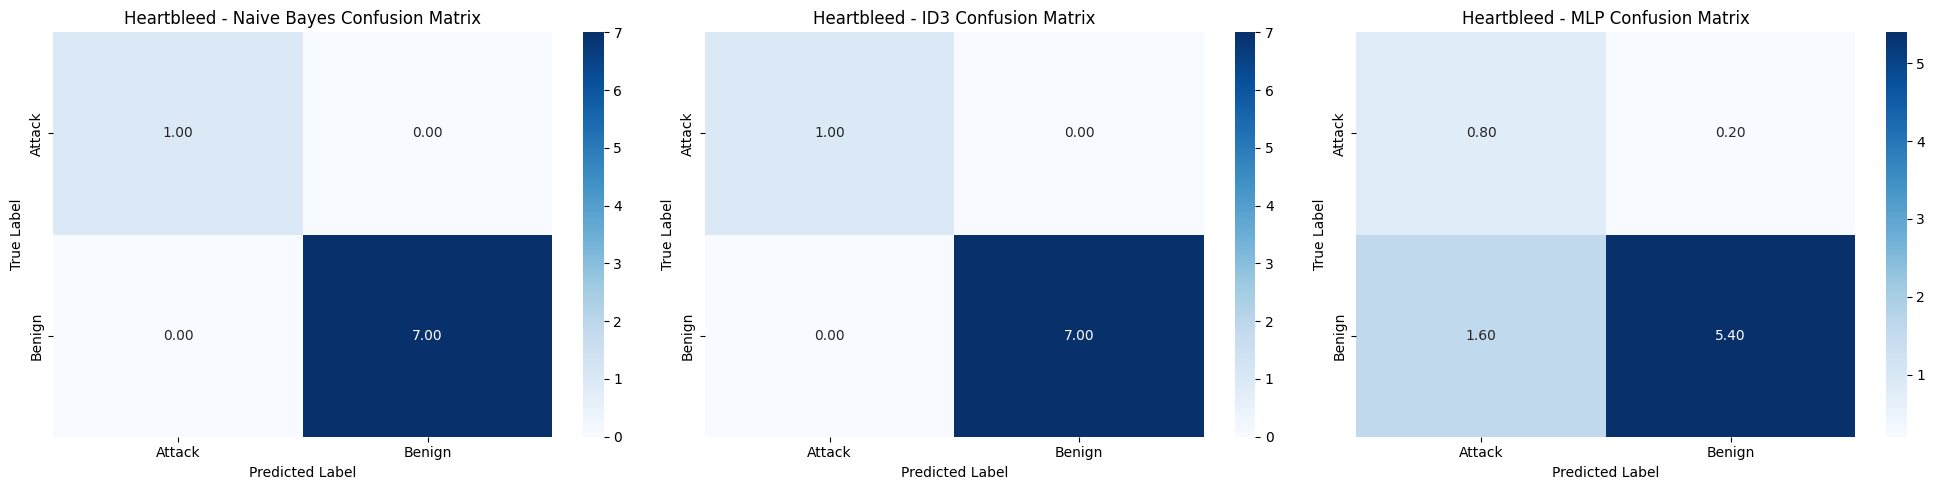

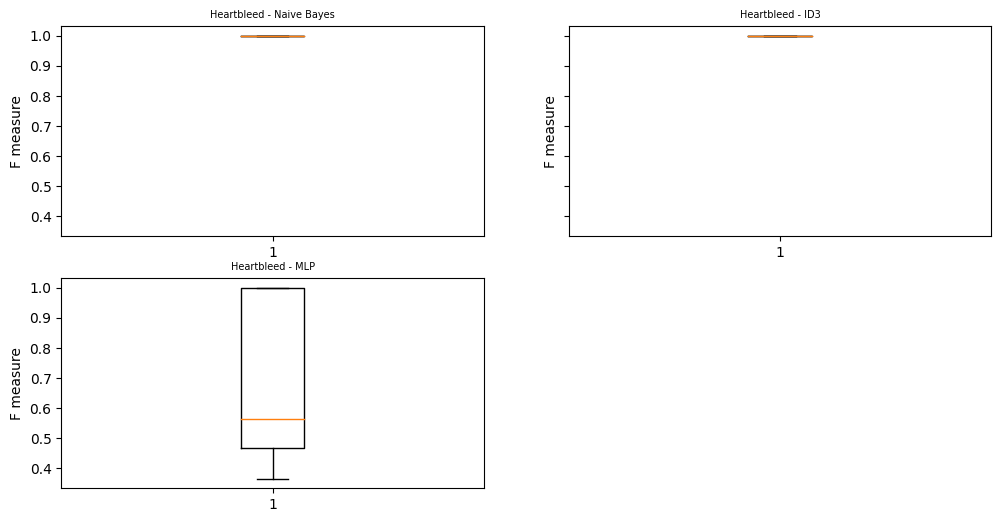


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.41            0.59            0.55            0.39            0.0321         
DoS Slowhttptest  ID3                0.98            0.99            0.97            0.98            0.0541         
DoS Slowhttptest  MLP                0.81            0.82            0.78            0.73            2.769          


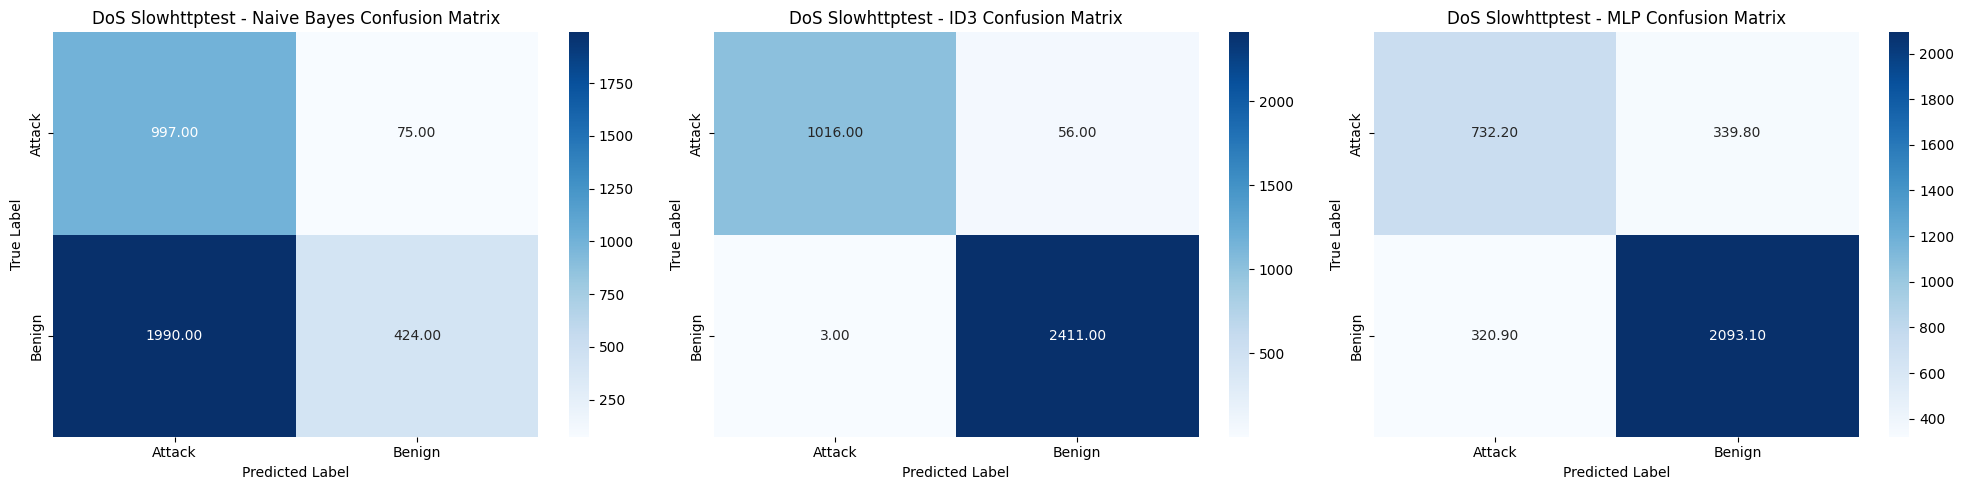

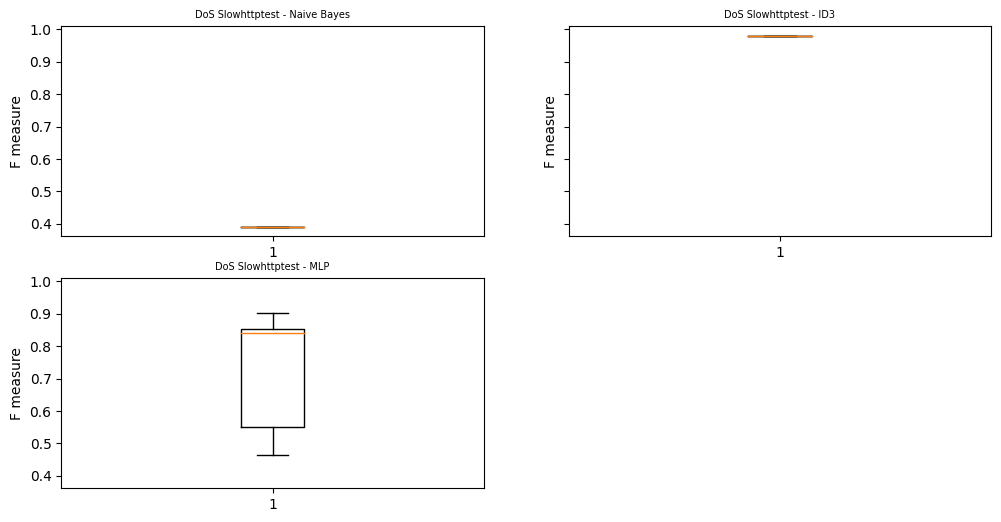


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Web Attack        Naive Bayes        1.0             1.0             1.0             1.0             0.0235         
Web Attack        ID3                1.0             1.0             1.0             1.0             0.0199         
Web Attack        MLP                1.0             1.0             1.0             1.0             0.4431         


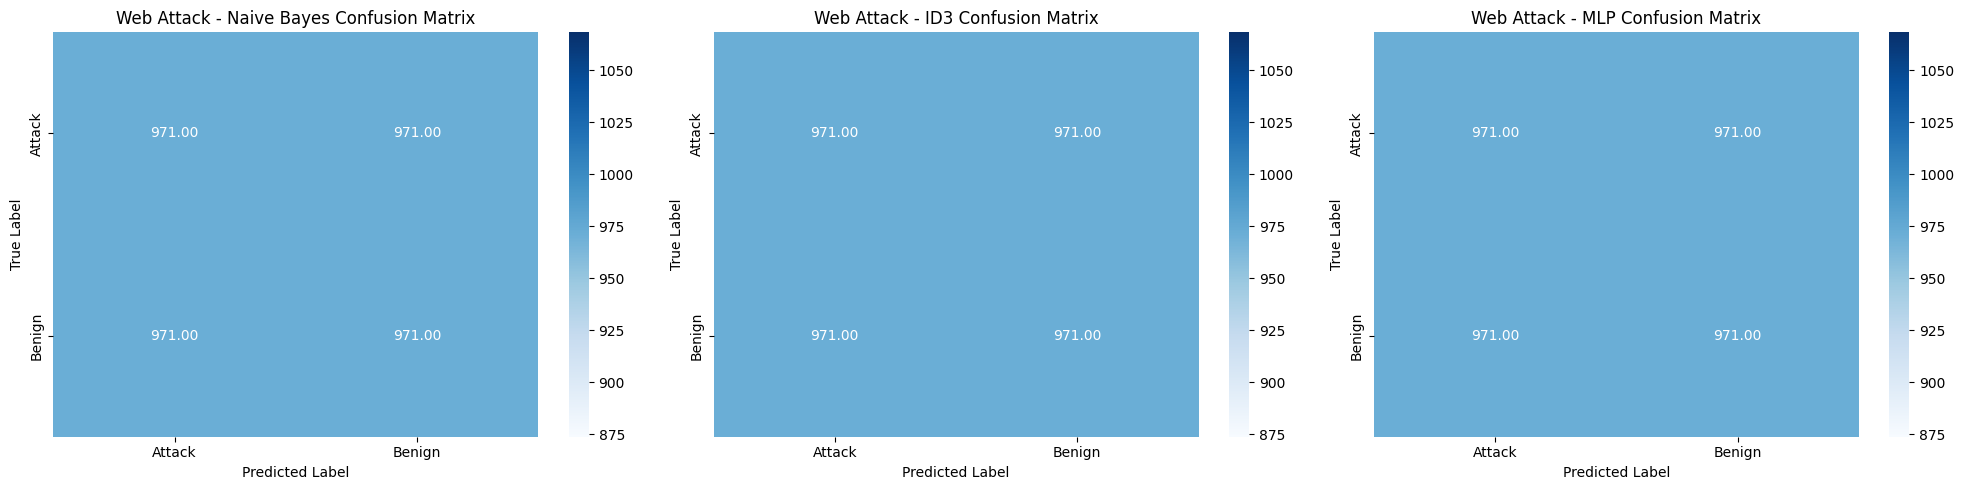

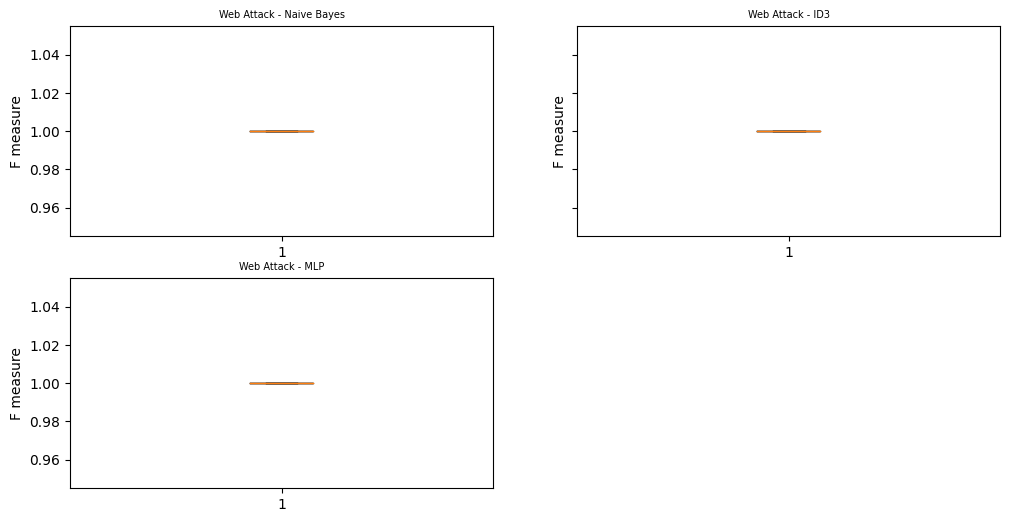


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.77            0.73            0.69            0.7             0.0804         
DDoS              ID3                0.96            0.95            0.97            0.96            0.2945         
DDoS              MLP                0.73            0.73            0.67            0.62            29.9784        


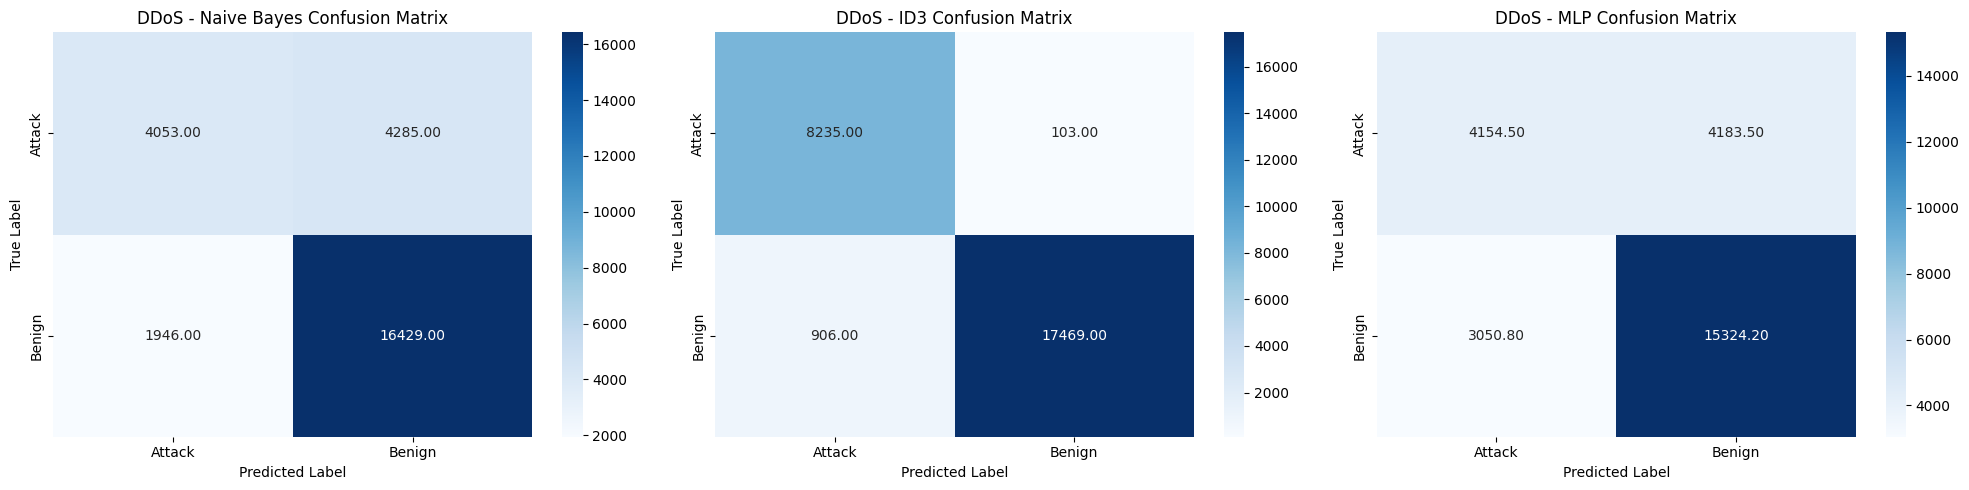

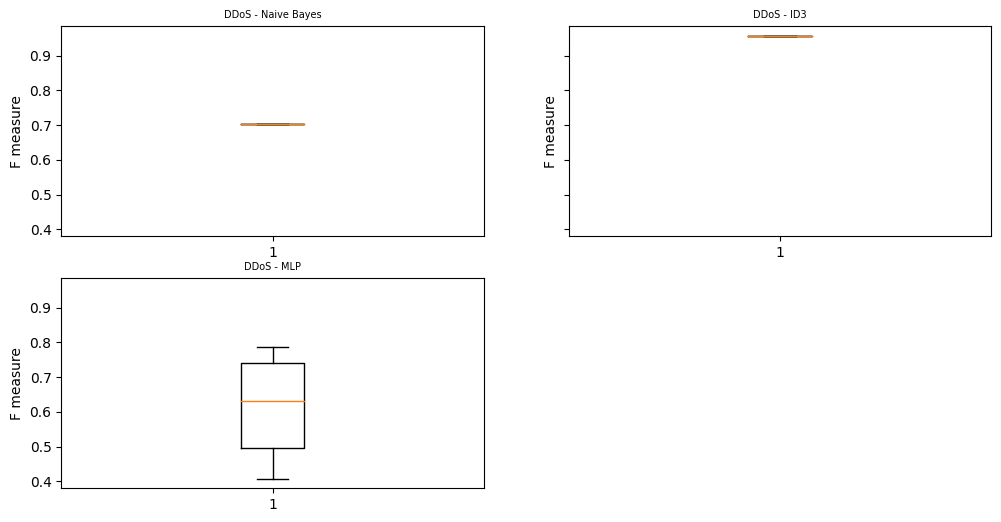


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.45            0.67            0.6             0.43            0.4652         
PortScan          ID3                1.0             1.0             1.0             1.0             1.0455         
PortScan          MLP                0.71            0.74            0.53            0.45            62.3193        


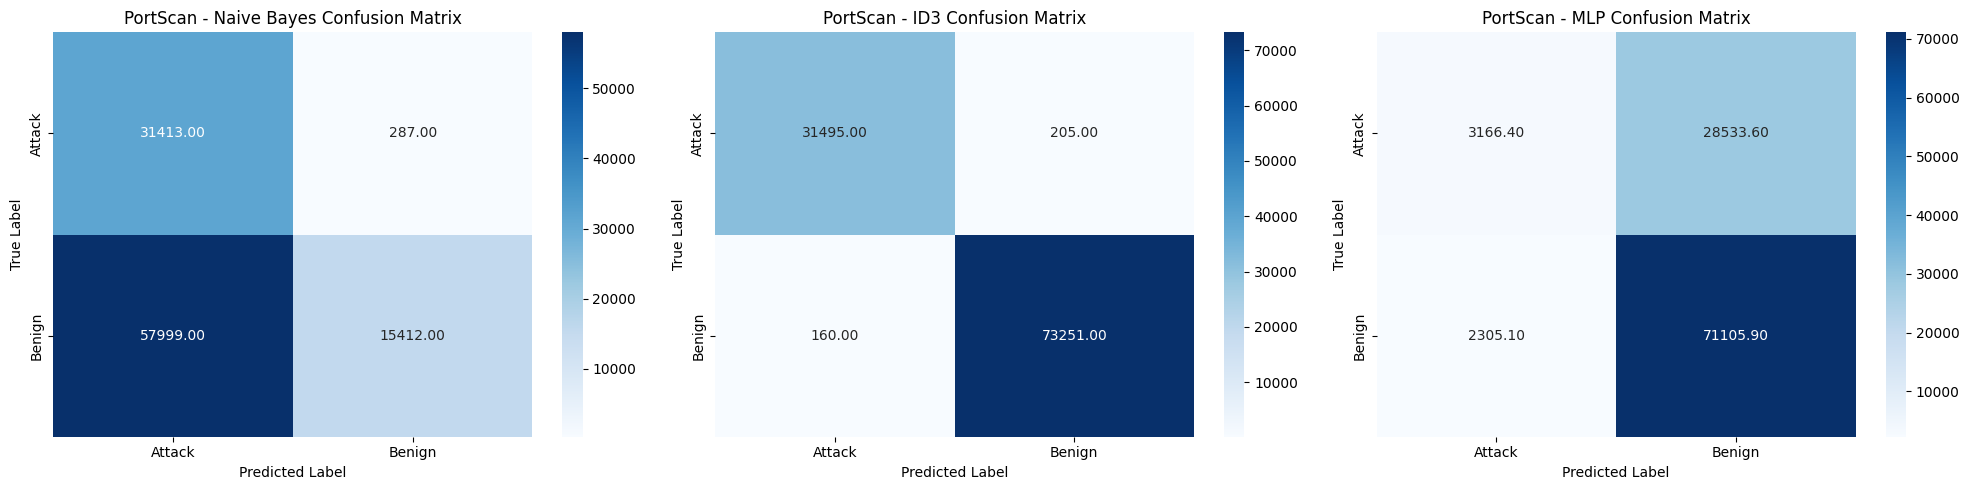

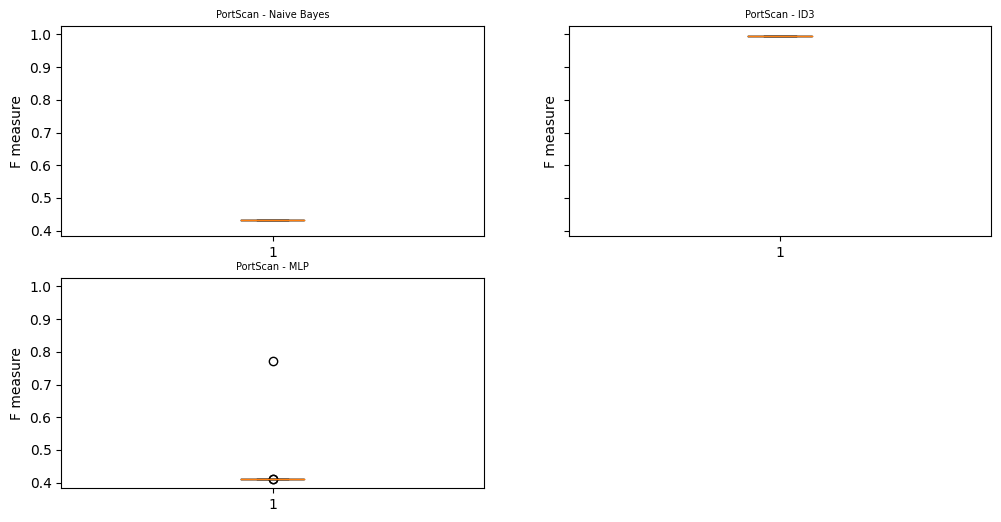


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        1.0             0.99            1.0             1.0             0.0394         
FTP-Patator       ID3                1.0             1.0             1.0             1.0             0.0523         
FTP-Patator       MLP                1.0             1.0             1.0             1.0             6.6643         


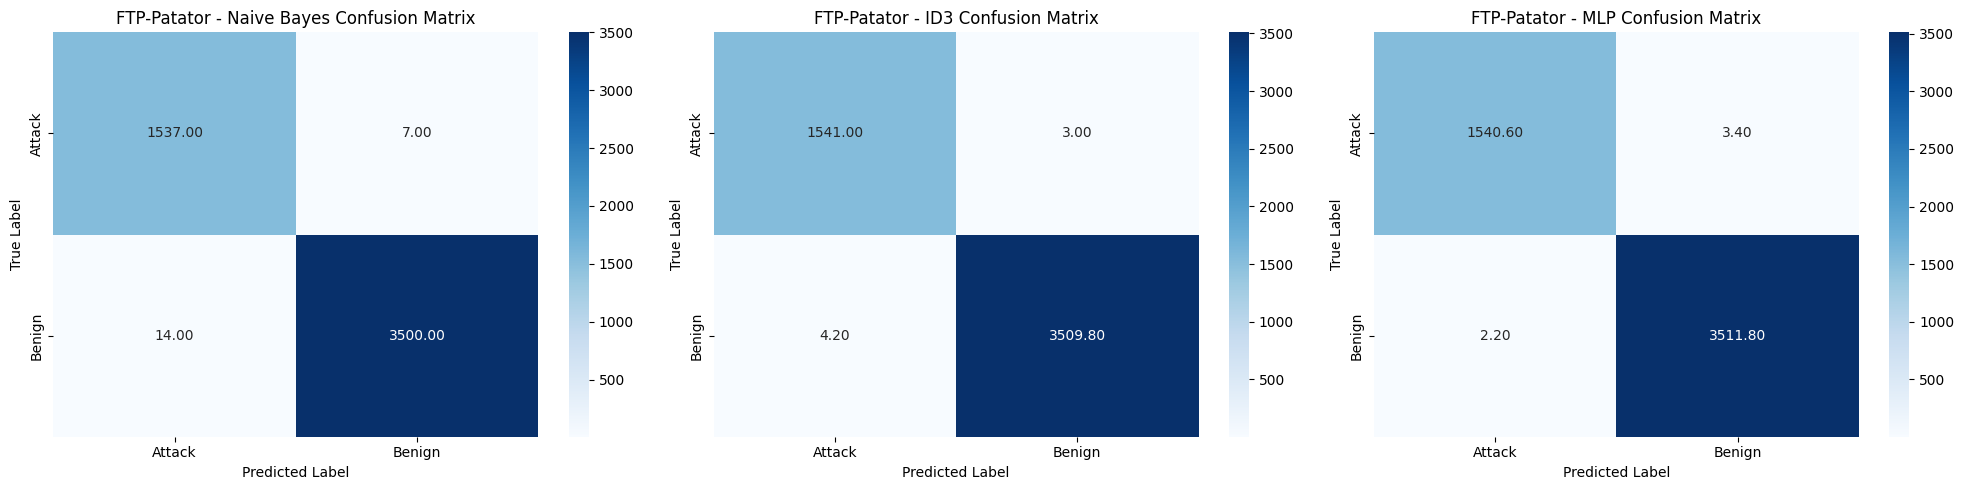

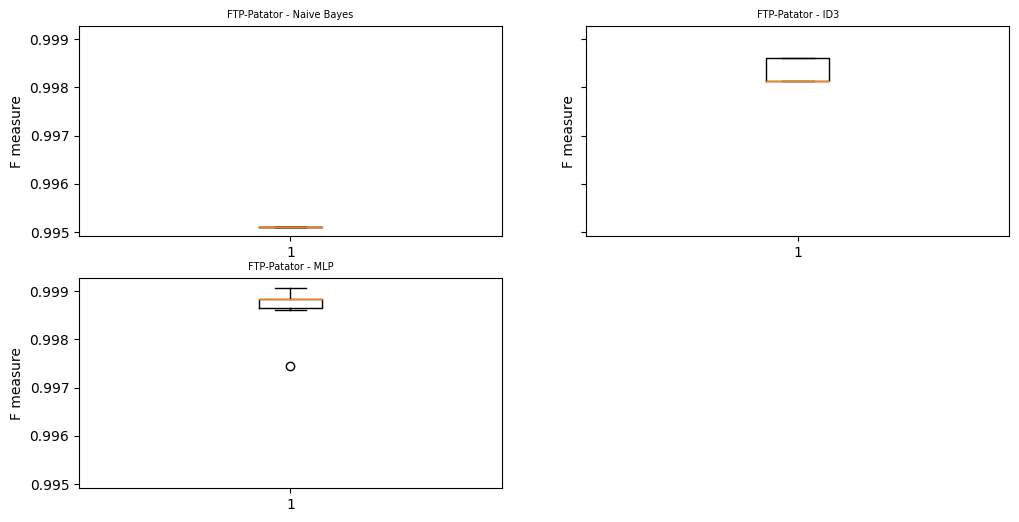


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Infiltration      Naive Bayes        0.88            0.85            0.81            0.82            0.0172         
Infiltration      ID3                0.88            0.85            0.81            0.82            0.0171         
Infiltration      MLP                0.43            0.39            0.51            0.36            0.0392         


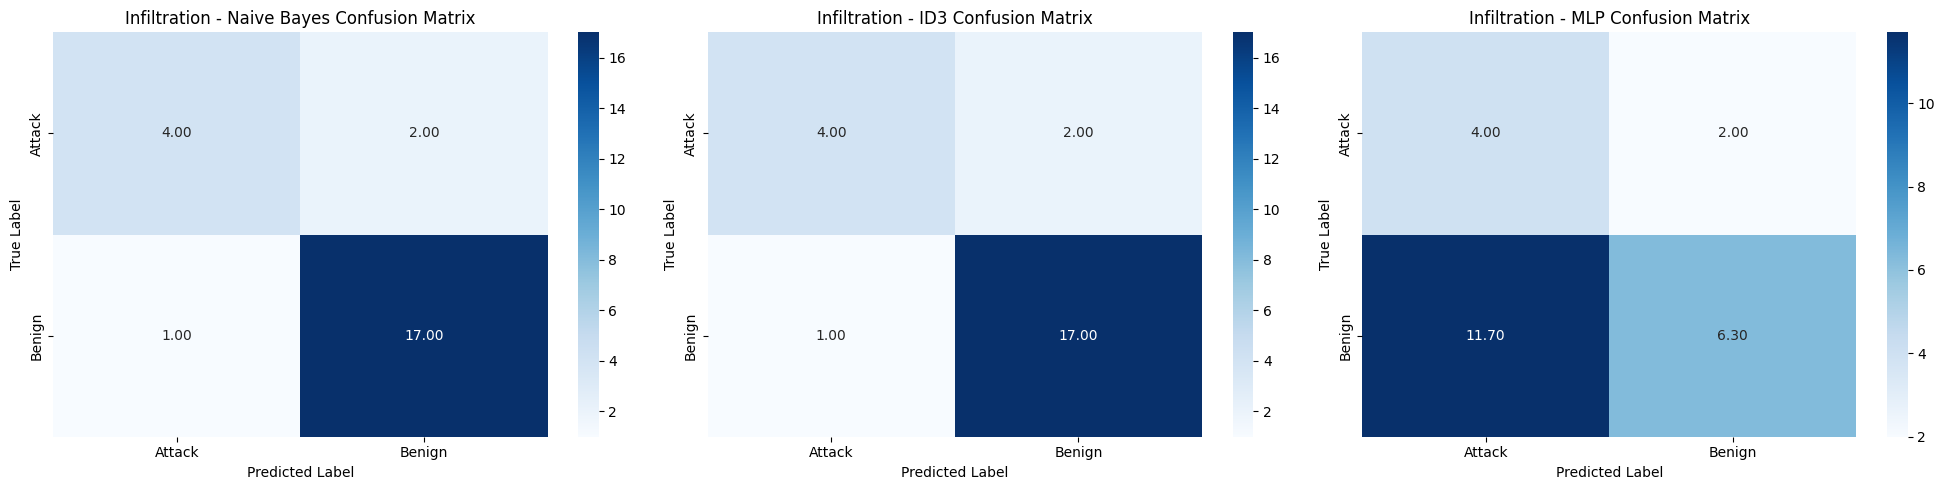

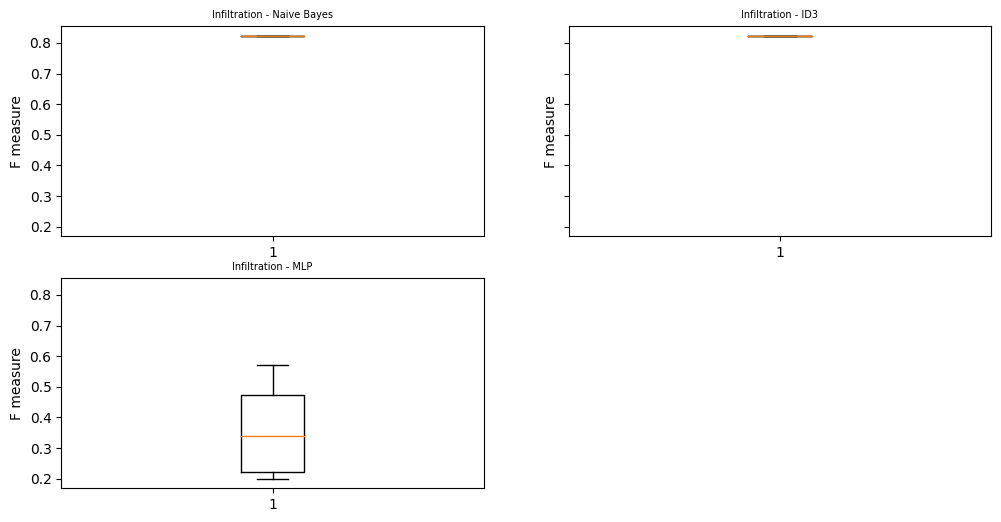


------------------------------------------------------------------------------------------------------


görev tamamlandı!
Toplam işlem süresi: = 2261.7867155075073 saniye


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import time
import warnings

warnings.filterwarnings("ignore")

result = "./results/results_1.csv"  # Sonuçların kaydedildiği bir CSV dosyası adı veriliyor.
csv_files = os.listdir("/content/attacks")  # attacks klasöründeki dosya adları alınıyor ve bir listeye atanıyor (csv_files).
path = "/content/attacks/"
repetition = 10

def folder(f_name):  # Bu fonksiyon program dizininde "results" ve "result_graph_1" adında klasörler oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_1/"
folder(folder_name)

# Kullanılacak makine öğrenme algoritmaları bir sözlükte tanımlanır (ml_list).
ml_list = {
    "Naive Bayes": GaussianNB(),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)
}

# Her saldırı türü için kullanılacak özellikler bir sözlükte tanımlanır (features).
# "04_1_feature_selection_for_attack_files.py" dosyası tarafından oluşturulan özelliklerin ilk 4'ü burada kullanılır.
features = {
    "Bot": ["Bwd Packet Length Mean", "Flow IAT Max", "Flow Duration", "Flow IAT Min", "Label"],
    "DDoS": ["Bwd Packet Length Std", "Total Backward Packets", "Fwd IAT Total", "Flow Duration", "Label"],
    "DoS GoldenEye": ["Flow IAT Max", "Bwd Packet Length Std", "Flow IAT Min", "Total Backward Packets", "Label"],
    "DoS Hulk": ["Bwd Packet Length Std", "Fwd Packet Length Std", "Fwd Packet Length Max", "Flow IAT Min", "Label"],
    "DoS Slowhttptest": ["Flow IAT Mean", "Fwd Packet Length Min", "Bwd Packet Length Mean", "Total Length of Bwd Packets", "Label"],
    "DoS slowloris": ["Flow IAT Mean", "Total Length of Bwd Packets", "Bwd Packet Length Mean", "Total Fwd Packets", "Label"],
    "FTP-Patator": ["Fwd Packet Length Max", "Fwd Packet Length Std", "Fwd Packet Length Mean", "Bwd Packet Length Std", "Label"],
    "Heartbleed": ["Total Backward Packets", "Fwd Packet Length Max", "Flow IAT Min", "Bwd Packet Length Max", "Label"],
    "Infiltration": ["Fwd Packet Length Max", "Fwd Packet Length Mean", "Flow Duration", "Total Length of Fwd Packets", "Label"],
    "PortScan": ["Flow Bytes/s", "Total Length of Fwd Packets", "Fwd IAT Total", "Flow Duration", "Label"],
    "SSH-Patator": ["Fwd Packet Length Max", "Flow Duration", "Flow IAT Max", "Total Length of Fwd Packets", "Label"],
    "Web Attack": ["Bwd Packet Length Std", "Total Length of Fwd Packets", "Flow Bytes/s", "Flow IAT Max", "Label"]
}

seconds = time.time()  # tüm işlem süresi için zaman damgası

with open(result, "w", newline="", encoding="utf-8") as f:  # elde edilen sonuçların kaydedilmesi için bir CSV dosyası oluşturulur.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # Bu döngü dosya adlarını içeren liste üzerinde çalışır. İşlemler tüm saldırı dosyaları için tekrarlanır.
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # çıktı başlığını yazdır
    a = []

    try:
        feature_list = list(features[j[0:-4]])
        df = pd.read_csv(path + j, usecols=feature_list)  # bir saldırı dosyasını oku.
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı: {e}")
        continue
    except Exception as e:
        print(f"Diğer hata: {e}")
        continue

    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]:  # makine öğrenme algoritmasında kullanılmak üzere normal etiketi "1" ve saldırı etiketini "0" olarak değiştirir.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"]  # bu bölüm etiket ve veriyi iki ayrı parça halinde ayırır, Label=y Data=X
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    confusion_matrices = {}  # Tüm algoritmaların karmaşıklık matrislerini saklamak için bir sözlük oluştur.

    for ii in ml_list:  # Bu döngü makine öğrenme algoritması adlarını içeren liste üzerinde çalışır. İşlemler tüm algoritmalar için tekrarlanır.
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        cm_all = np.zeros((2, 2))  # Karmaşıklık matrisinin toplanması için bir matris oluşturulur.

        for i in range(repetition):  # Bu döngü çapraz doğrulama ve makine öğrenme algoritmasının 10 kez tekrarlanmasını sağlar.
            second = time.time()  # işlem süresi için zaman damgası

            # çapraz doğrulama
            X_train, X_test, y_train, y_test = train_test_split(X, y,  # veri (X) ve etiketler (y) makine öğrenme algoritmasına gönderilmek üzere 2 parçaya bölünür (%80 eğitim, %20 test).
                                                               test_size=0.20, random_state=repetition)  # Bu nedenle, toplamda 4 parça vardır: eğitim verisi (X_train), eğitim etiketi (y_train), test verisi (X_test) ve test etiketi (y_test).

            # makine öğrenme algoritması bu bölümde uygulanır
            clf = ml_list[ii]  # ml_list sözlüğünden algoritma seç
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # "classification report" oluşturur ve precision, f-measure ve recall değerlerini atar.

            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

            # Karmaşıklık matrisini hesapla
            cm = confusion_matrix(y_test, predict)
            cm_all += cm  # Tüm tekrarlar boyunca matrisi topla

        cm_all /= repetition  # Karmaşıklık matrisinin ortalamasını al

        confusion_matrices[ii] = cm_all  # Karmaşıklık matrisini sözlüğe ekle

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
                                                               str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))  # on tekrarın sonucu ekrana yazdırılır.

        with open(result, "a", newline="", encoding="utf-8") as f:  # bulunan tüm değerler açılan dosyaya kaydedilir.
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])  # dosya adı, algoritma adı, precision, recall ve f-measure CSV dosyasına yazılır.
        a.append(f1)

    # Karmaşıklık matrislerinin grafiğini çiz
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    for idx, (key, cm) in enumerate(confusion_matrices.items()):
        sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Attack", "Benign"], yticklabels=["Attack", "Benign"], ax=axs[idx])
        axs[idx].set_title(f'{j[0:-4]} - {key} Confusion Matrix')
        axs[idx].set_ylabel('True Label')
        axs[idx].set_xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'./results/confusion_matrix_{j[0:-4]}.pdf', bbox_inches='tight', format='pdf')
    plt.show()

    # Bu bölümde, makine öğrenme algoritmalarının sonuçları için Box grafikler oluşturulur ve feature_graph klasörüne kaydedilir.

    ml = ["Naive Bayes", "ID3", "MLP"]
    temp = 0
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(2):
            if temp < 3:
                axes[c, b].boxplot(a[temp])
                axes[c, b].set_title(str(j[0:-4]) + " - " + str(ml[temp]), fontsize=7)
                axes[c, b].set_ylabel("F measure")
                temp += 1
            else:
                axes[c, b].axis('off')  # Dördüncü ekseni kapat
        if temp == 3:
            break
    plt.savefig(folder_name + j[0:-4] + ".pdf", bbox_inches='tight', format='pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")

print("görev tamamlandı!")
print("Toplam işlem süresi: =", time.time() - seconds, "saniye")


Dosya             ML algoritması     Doğruluk        Hassasiyet      Duyarlılık      F1-skoru        Zaman          
all_data          Naive Bayes        0.78            0.63            0.64            0.64            4.2435         


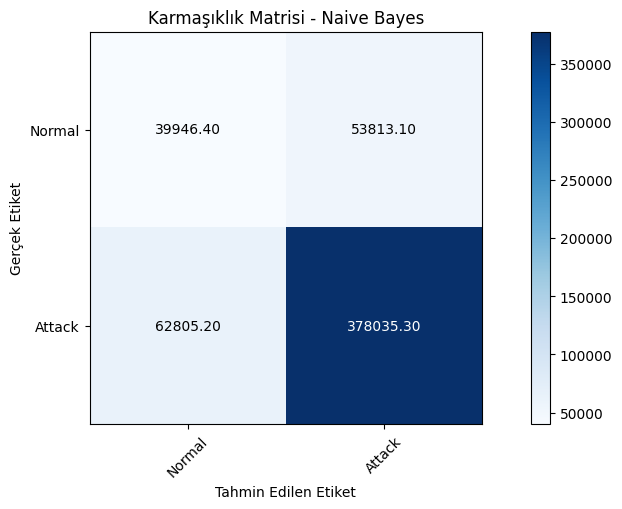

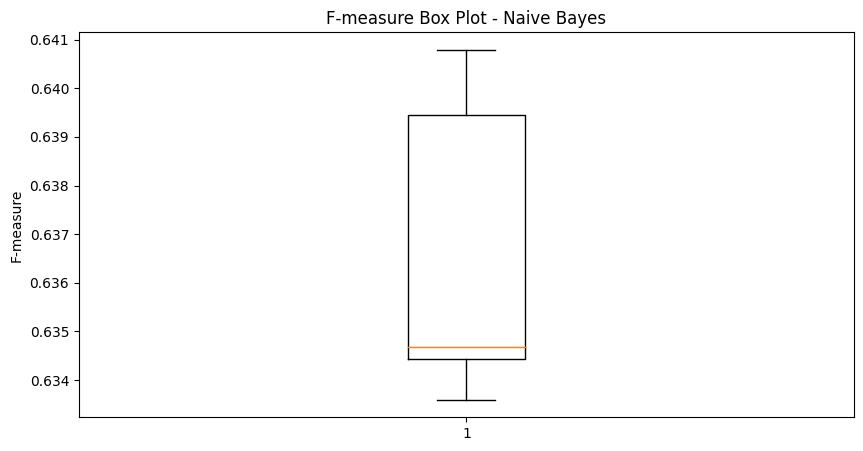

all_data          MLP                0.83            0.74            0.54            0.53            245.2022       


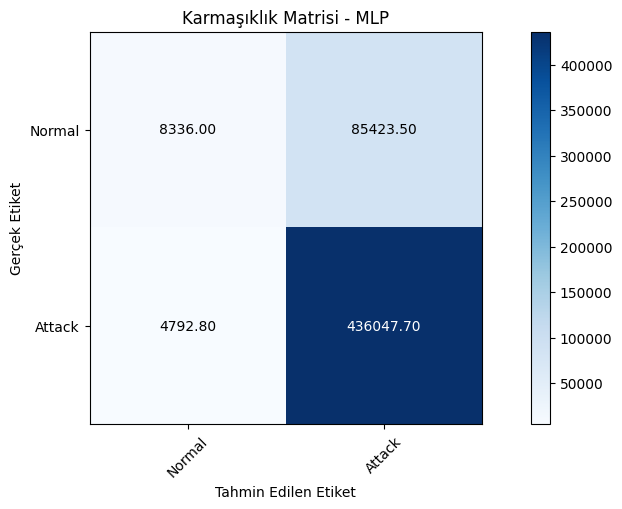

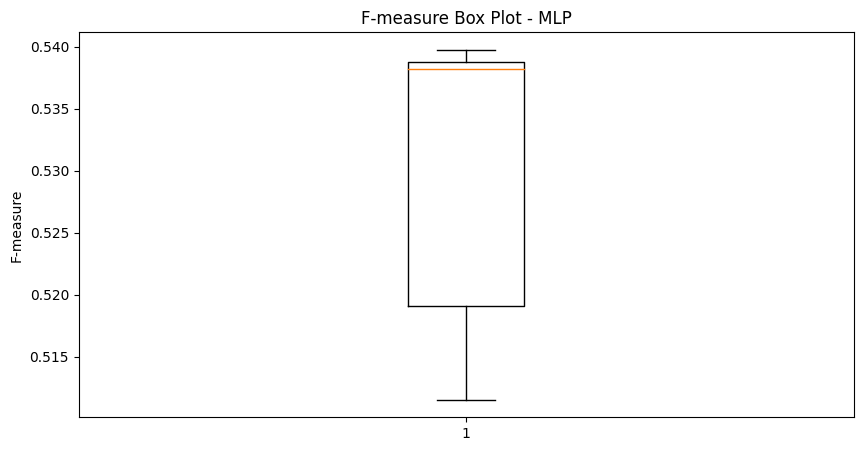

all_data          ID3                0.95            0.97            0.86            0.9             32.9234        


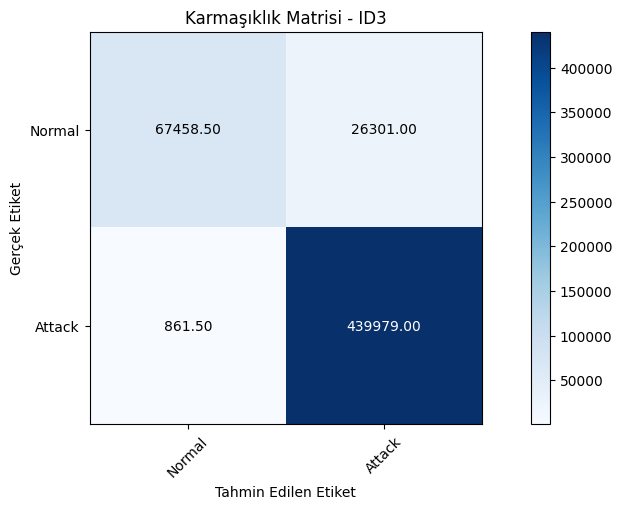

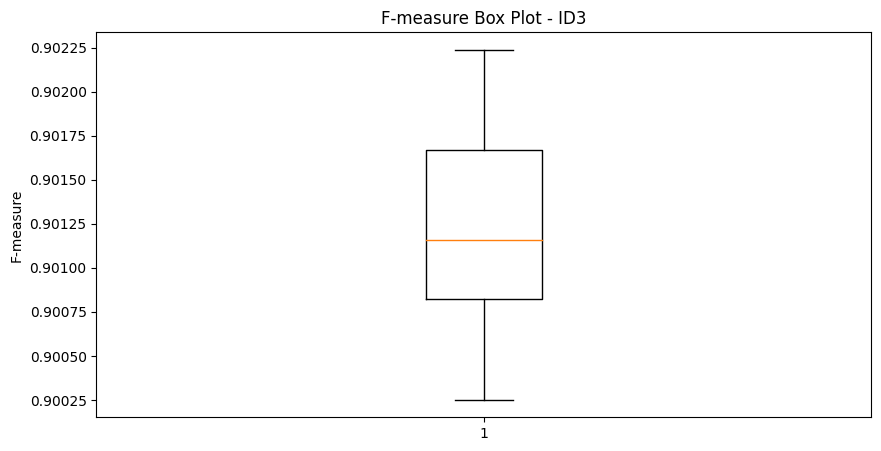

Görev tamamlandı!
Toplam işlem süresi: = 2843.6878774166107 saniye


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings

warnings.filterwarnings("ignore")

# Sonuçların kaydedileceği CSV dosyası
result = "./results/results_2.csv"

# Kullanılacak CSV dosyaları
csv_files = ["all_data.csv"]

# CSV dosyalarının bulunduğu dizin (eğer aynı dizindeyse boş bırakabilirsiniz)
path = ""

# Tekrar sayısı
repetition = 10

# Sonuçları kaydetmek için klasör oluşturma fonksiyonu
def create_folder(f_name):
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

# Sonuçların kaydedileceği ana klasör ve grafiklerin kaydedileceği klasörler oluşturuluyor
result_folder = "./results/"
create_folder(result_folder)
graph_folder = "./results/result_graph_2/"
create_folder(graph_folder)

# Kullanılacak ML algoritmaları ve isimleri
ml_algorithms = {
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy")
}

# Kullanılacak özellikler (features)
features = {
    "all_data": [
        "Bwd Packet Length Max", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s",
        "Flow Duration", "Flow IAT Max", "Flow IAT Mean", "Flow IAT Min", "Flow IAT Std", "Fwd IAT Total",
        "Fwd Packet Length Max", "Fwd Packet Length Mean", "Fwd Packet Length Min", "Fwd Packet Length Std",
        "Total Backward Packets", "Total Fwd Packets", "Total Length of Bwd Packets", "Total Length of Fwd Packets",
        "Label"
    ]
}

# Başlangıç zamanı
start_time = time.time()

# CSV dosyaları üzerinde işlemler yapılıyor
for csv_file in csv_files:
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("Dosya", "ML algoritması", "Doğruluk", "Hassasiyet", "Duyarlılık", "F1-skoru", "Zaman"))
    feature_list = features[csv_file[0:-4]]
    df = pd.read_csv(path + csv_file, usecols=feature_list)
    df = df.fillna(0)
    df["Label"] = df["Label"].apply(lambda x: 1 if x == "BENIGN" else 0)

    y = df["Label"]
    X = df.drop(columns=["Label"])
    feature_list.remove('Label')

    for alg_name, alg in ml_algorithms.items():
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        cm_sum = np.zeros((2, 2))  # Toplam karmaşıklık matrisi

        for i in range(repetition):
            second = time.time()

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)

            clf = alg
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')
            cm = confusion_matrix(y_test, predict)
            cm_sum += cm

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        avg_cm = cm_sum / repetition
        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (csv_file[0:-4], alg_name, str(round(np.mean(accuracy), 2)),
                                                              str(round(np.mean(precision), 2)), str(round(np.mean(recall), 2)),
                                                              str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        # Sonuçları CSV dosyasına yaz
        with open(result, "a", newline="", encoding="utf-8") as f:
            wrt = csv.writer(f)
            for i in range(len(t_time)):
                wrt.writerow([csv_file[0:-4], alg_name, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])

        # Karmaşıklık matrisini çiz ve göster
        plt.figure()
        plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Karmaşıklık Matrisi - " + alg_name)
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ["Normal", "Attack"], rotation=45)
        plt.yticks(tick_marks, ["Normal", "Attack"])
        plt.tight_layout()
        plt.ylabel('Gerçek Etiket')
        plt.xlabel('Tahmin Edilen Etiket')

        # Matrisin içine sayıları yazdır
        thresh = avg_cm.max() / 2.0
        for i in range(avg_cm.shape[0]):
            for j in range(avg_cm.shape[1]):
                plt.text(j, i, format(avg_cm[i, j], '.2f'),
                         ha="center", va="center",
                         color="white" if avg_cm[i, j] > thresh else "black")

        plt.savefig(graph_folder + csv_file[0:-4] + "_" + alg_name + "_karmaşıklık_matrisi.pdf", bbox_inches='tight', format='pdf')
        plt.show()

        # F-measure box plot grafikleri oluştur
        plt.figure()
        plt.boxplot(f1)
        plt.title("F-measure Box Plot - " + alg_name)
        plt.ylabel('F-measure')
        plt.savefig(graph_folder + csv_file[0:-4] + "_" + alg_name + "_f1_boxplot.pdf", bbox_inches='tight', format='pdf')
        plt.show()

print("Görev tamamlandı!")
print("Toplam işlem süresi: =", time.time() - start_time, "saniye")


05_3_machine_learning_implementation_with_7_feature

File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.81            0.66            0.63            0.65            2.7321         


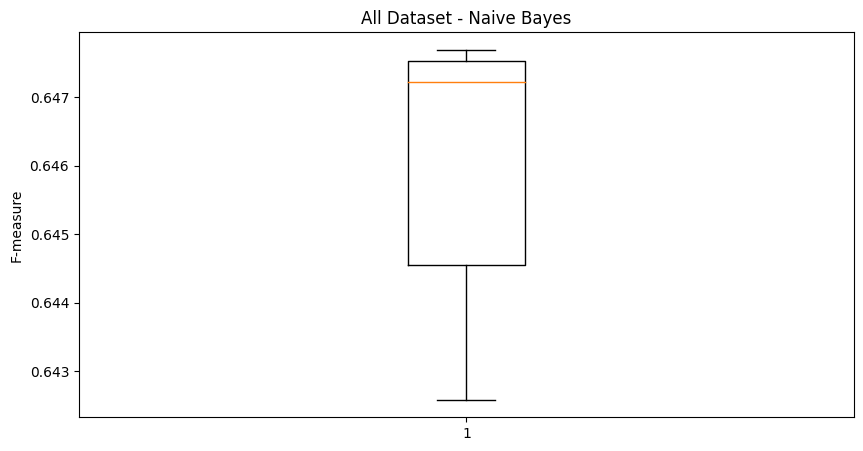

all_data          ID3                0.95            0.93            0.89            0.91            13.9333        


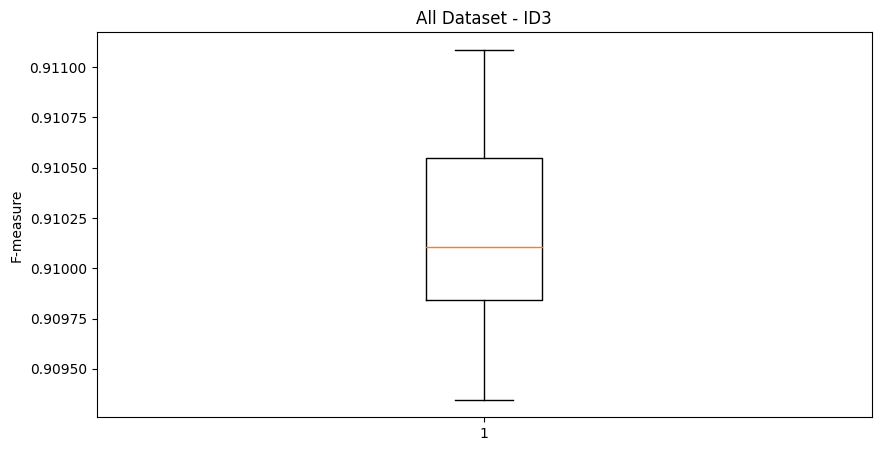

all_data          MLP                0.83            0.74            0.54            0.53            315.6947       


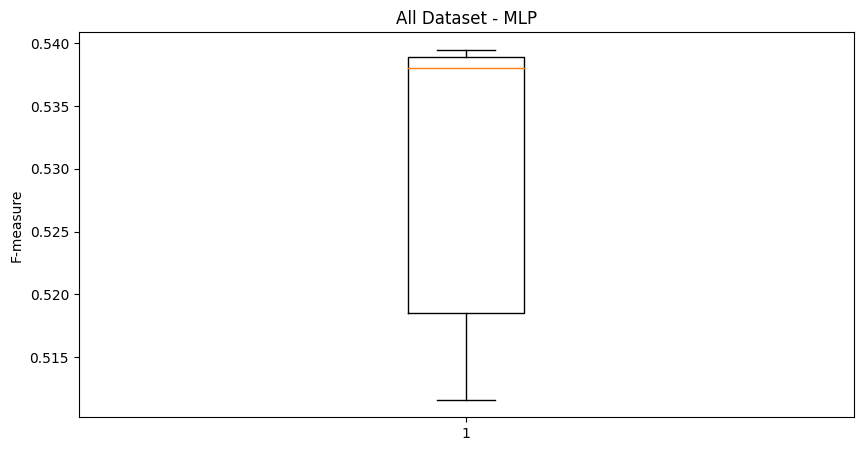

Görev tamamlandı!
Toplam işlem süresi: =  3340.5485422611237 saniye


In [ ]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")

result = "./results/results_3.csv"  # Sonuçların kaydedileceği CSV dosyasının adı.
csv_files = ["all_data.csv"]  # CSV dosyalarının isimleri: veri seti dosyalarının isimleri (csv_files).
path = ""
repetition = 10

def folder(f_name):  # Bu fonksiyon program dizininde "results" ve "result_graph_1" adında klasörler oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_3/"
folder(folder_name)

# Kullanılacak makine öğrenmesi algoritmaları bir sözlükte tanımlanır (ml_list).
ml_list = {
    "Naive Bayes": GaussianNB(),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)
}

# İçe aktarılacak tüm sütunların listesi
# "04_2_feature_selection_for_attack_files.py" dosyası tarafından seçilen en yüksek öneme sahip 7 özellik burada kullanılır. (+ Etiket Özelliği)
features = {"all_data": ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std",
                         "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total", "Label"]}

seconds = time.time()  # İşlem süresi için zaman damgası

with open(result, "w", newline="", encoding="utf-8") as f:  # Elde edilen sonuçların kaydedileceği bir CSV dosyası oluşturulur.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # Bu döngü dosya isimlerini içeren listede çalışır. İşlemler tüm saldırı dosyaları için tekrarlanır.
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # Çıktı başlığını yazdırır.
    feature_list = list(features[j[0:-4]])
    df = pd.read_csv(path + j, usecols=feature_list)  # Bir saldırı dosyasını okur.
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]:  # Makine öğrenmesi algoritmasında kullanmak üzere normal etiketi "1" ve saldırı etiketini "0" olarak değiştirir.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"]  # Bu bölümde etiket ve veriler iki ayrı parçaya ayrılır, Etiket=y Veri=X
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    for ii in ml_list:  # Bu döngü makine öğrenmesi algoritma isimlerini içeren listede çalışır. İşlemler 3 algoritma için tekrarlanır.
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        for i in range(repetition):  # Bu döngü çapraz doğrulama ve makine öğrenmesi algoritmasının 10 kez tekrarlanmasını sağlar.
            second = time.time()  # İşlem süresi için zaman damgası.

            # Çapraz doğrulama
            X_train, X_test, y_train, y_test = train_test_split(X, y,  # Veri (X) ve etiketler (y) makine öğrenmesi algoritmasına gönderilmek üzere 2 parçaya ayrılır (yüzde 80 eğitim, yüzde 20 test).
                                                                test_size=0.20, random_state=i)  # Toplamda 4 parça vardır: eğitim verisi(X_train), eğitim etiketi(y_train), test verisi(X_test) ve test etiketi(y_test).

            # Makine öğrenmesi algoritması bu bölümde uygulanır.
            clf = ml_list[ii]  # ml_list sözlüğünden algoritma seçilir.
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # "classification report" oluşturur ve precision, f-measure ve recall değerlerini atar.
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (
            j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
            str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))  # On tekrarlamanın sonucu ekrana yazdırılır.

        with open(result, "a", newline="", encoding="utf-8") as f:  # Bulunan tüm değerler açılan dosyaya kaydedilir.
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])  # Dosya adı, algoritma adı, precision, recall ve f-measure CSV dosyasına yazılır.

        # Bu bölümde makine öğrenmesi algoritmalarının sonuçları için Box grafikler oluşturulur ve feature_graph klasörüne kaydedilir.
        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', format='pdf')
        plt.show()  # Grafiklerin eşzamanlı olarak görülmesini isterseniz # işaretini kaldırabilirsiniz.

print("Görev tamamlandı!")
print("Toplam işlem süresi: = ", time.time() - seconds, "saniye")


05_4_machine_learning_implementation_final.


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.87            0.79            0.69            0.72            2.3333         


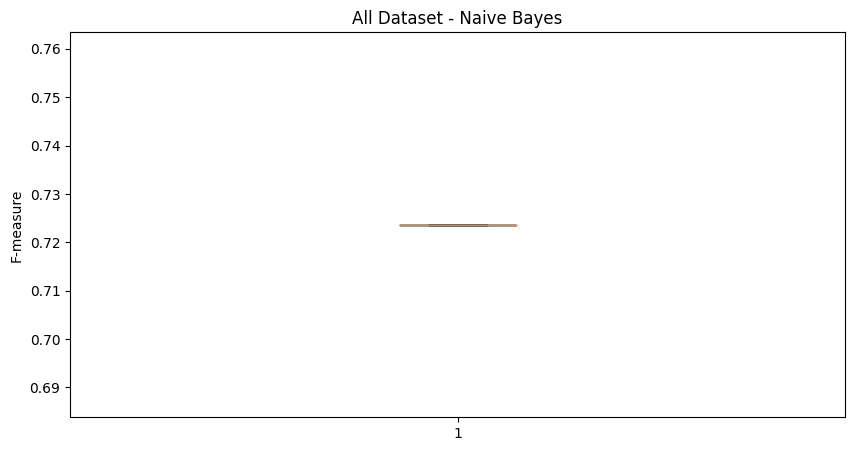

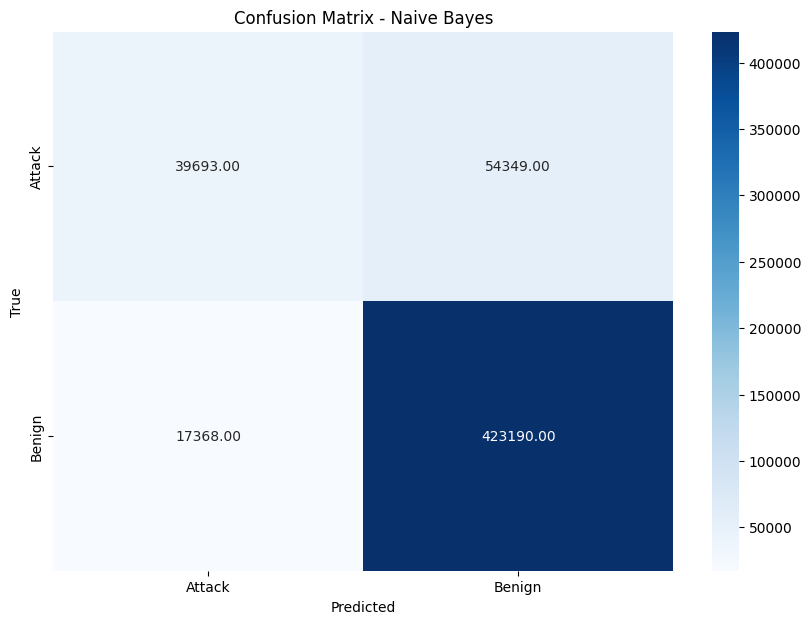

all_data          MLP                0.88            0.85            0.68            0.71            561.4668       


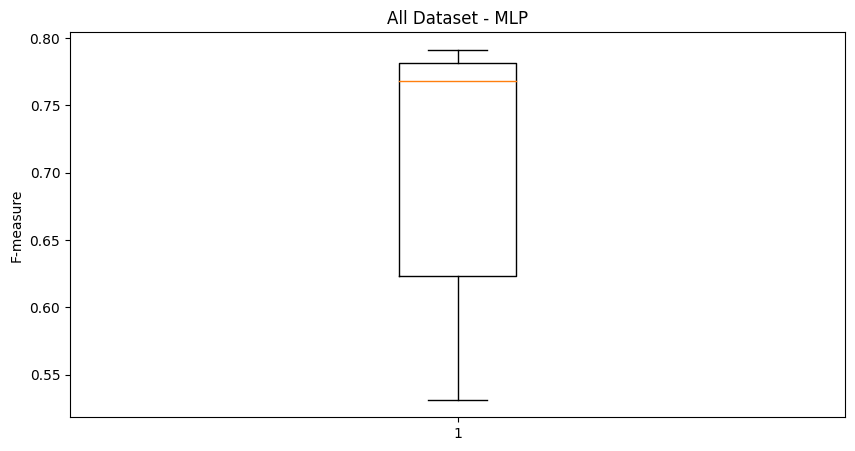

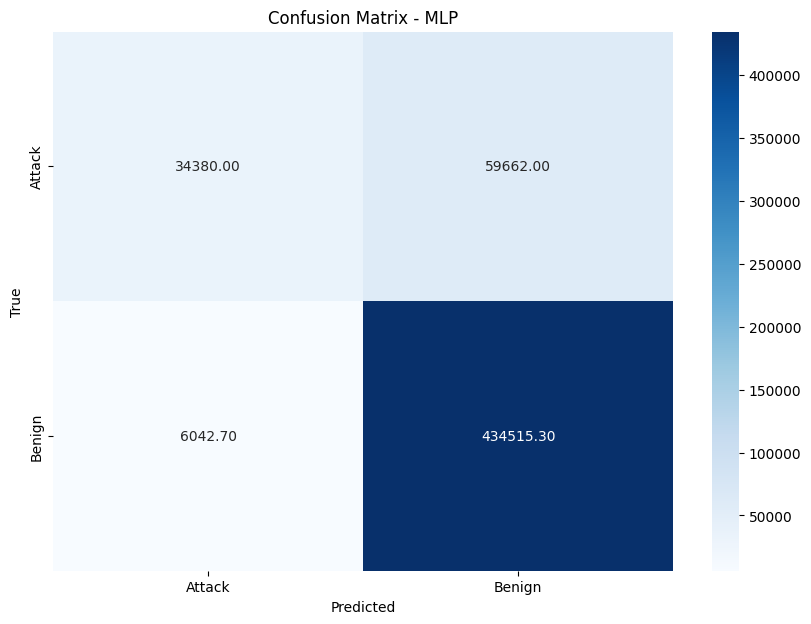

all_data          ID3                0.95            0.93            0.89            0.91            14.292         


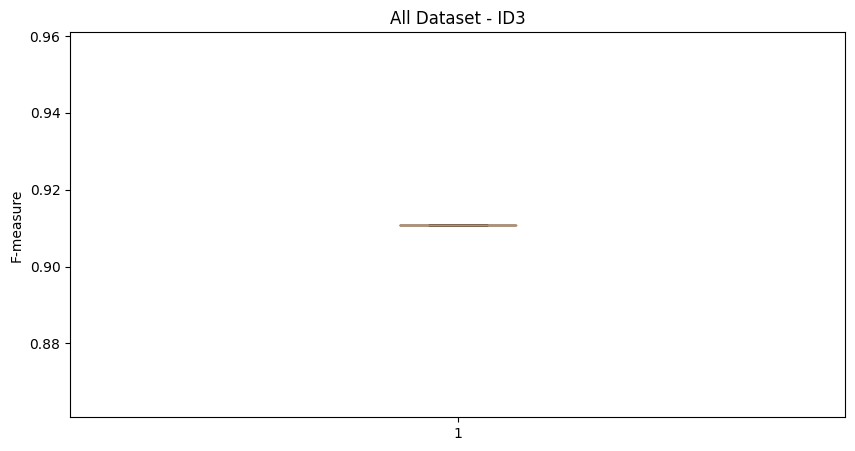

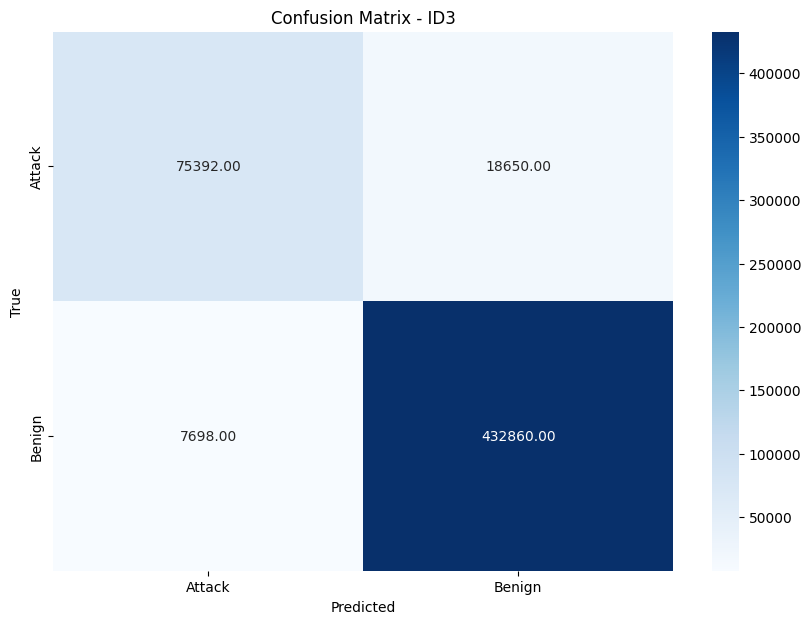

Görev tamamlandı!
Toplam işlem süresi: =  5809.7811460494995 saniye


In [ ]:
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")

def folder(f_name):  # Bu fonksiyon program dizininde "feaure_graph" adında bir klasör oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

result = "./results/results_Final.csv"  # Sonuçların kaydedildiği bir CSV dosyası adı.
csv_files = ["all_data.csv"]  # CSV dosyalarının isimleri: veri seti dosyalarının isimleri (csv_files).
path = ""
repetition = 10

def folder(f_name):  # Bu fonksiyon program dizininde "results" ve "result_graph_1" adında klasörler oluşturur.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("Klasör oluşturulamadı!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_Final/"
folder(folder_name)

# "04_2_feature_selection_for_attack_files.py" dosyası tarafından seçilen 20 özellik burada kullanılır. (+ Etiket Özelliği)
usecols = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std", "Flow IAT Std",
           "Flow IAT Min", "Fwd IAT Total", "Flow Duration", "Bwd Packet Length Max", "Flow IAT Max", "Flow IAT Mean", "Total Length of Bwd Packets",
           "Fwd Packet Length Min", "Bwd Packet Length Mean", "Flow Packets/s", "Fwd Packet Length Mean", "Total Backward Packets", "Total Fwd Packets",
           "Fwd Packet Length Max", "Bwd Packet Length Min", 'Label']

# Kullanılacak makine öğrenmesi algoritmaları bir sözlükte tanımlanır (ml_list).
ml_list = {
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500),
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy")
}

# Bu algoritmalar için kullanılacak özellikler bir listede tanımlanır.
others = ["Bwd Packet Length Std", "Flow Bytes/s", "Total Length of Fwd Packets", "Fwd Packet Length Std",
          "Flow IAT Std", "Flow IAT Min", "Fwd IAT Total"]

# Bu bölümde makine öğrenmesi yöntemleri için farklı özellik setleri aşağıdaki gibi tanımlanır:
# "Naive Bayes" ve "MLP" için her yöntemin farklı bir özellik listesi vardır.
# "ID3" ise "others" listesindeki özellikleri kullanır.
algorithms_features = {
    "Naive Bayes": ['Bwd Packet Length Std', 'Total Length of Fwd Packets', 'Flow IAT Min', 'Fwd Packet Length Min', 'Flow Packets/s', 'Fwd Packet Length Mean'],
    "MLP": ['Bwd Packet Length Std', 'Flow Bytes/s', 'Total Length of Fwd Packets', 'Fwd Packet Length Std',
            'Flow IAT Min', 'Bwd Packet Length Max', 'Fwd Packet Length Min', 'Bwd Packet Length Mean',
            'Total Backward Packets', 'Total Fwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Min'],
    "ID3": others
}

seconds = time.time()  # Tüm işlem süresi için zaman damgası

with open(result, "w", newline="", encoding="utf-8") as f:  # Elde edilen sonuçların kaydedildiği bir CSV dosyası oluşturulur.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # Bu döngü dosya isimlerini içeren listede çalışır. İşlemler tüm saldırı dosyaları için tekrarlanır.
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # Çıktı başlığını yazdırır.
    feature_list = usecols
    df = pd.read_csv(path + j, usecols=feature_list)  # Bir saldırı dosyasını okur.
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]:  # Makine öğrenmesi algoritmasında kullanmak üzere normal etiketi "1" ve saldırı etiketini "0" olarak değiştirir.
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"]  # Bu bölümde etiket ve veriler iki ayrı parçaya ayrılır, Etiket=y Veri=X
    del df["Label"]
    feature_list.remove('Label')
    for ii in ml_list:  # Bu döngü makine öğrenmesi algoritma isimlerini içeren listede çalışır. İşlemler tüm algoritmalar için tekrarlanır.
        X = df[algorithms_features[ii]]
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        conf_matrices = []  # Confusion matrix'leri saklamak için liste
        for i in range(repetition):  # Bu döngü çapraz doğrulama ve makine öğrenmesi algoritmasının 10 kez tekrarlanmasını sağlar.
            second = time.time()  # İşlem süresi için zaman damgası

            # Çapraz doğrulama
            X_train, X_test, y_train, y_test = train_test_split(X, y,  # Veri (X) ve etiketler (y) makine öğrenmesi algoritmasına gönderilmek üzere 2 parçaya ayrılır.
                                                                test_size=0.20, random_state=repetition)  # Toplamda 4 parça vardır: eğitim verisi(X_train), eğitim etiketi(y_train), test verisi(X_test) ve test etiketi(y_test).

            # Makine öğrenmesi algoritması bu bölümde uygulanır
            clf = ml_list[ii]  # ml_list sözlüğünden algoritma seçilir.
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # "classification report" oluşturur ve precision, f-measure ve recall değerlerini atar.
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

            # Confusion matrix oluşturma
            conf_matrices.append(confusion_matrix(y_test, predict))

        # Ortalama confusion matrix hesaplama
        mean_conf_matrix = np.mean(conf_matrices, axis=0)

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
                                                             str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))  # On tekrarlamanın ortalama sonucu ekrana yazdırılır.

        with open(result, "a", newline="", encoding="utf-8") as f:  # Bulunan tüm değerler açılan dosyaya kaydedilir.
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])  # Dosya adı, algoritma adı, precision, recall ve f-measure CSV dosyasına yazılır.

        # Bu bölümde makine öğrenmesi algoritmalarının sonuçları için Box grafikler oluşturulur ve feaure_graph klasörüne kaydedilir.
        plt.boxplot(f1)
        plt.title("All Dataset - " + str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name + j[0:-4] + str(ii) + ".pdf", bbox_inches='tight', format='pdf')
        plt.show()  # Grafiklerin eşzamanlı olarak görülmesini isterseniz # işaretini kaldırabilirsiniz.

        # Confusion matrix görselleştirme ve kaydetme
        plt.figure(figsize=(10, 7))
        sns.heatmap(mean_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=["Attack", "Benign"], yticklabels=["Attack", "Benign"])
        plt.title("Confusion Matrix - " + str(ii))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(folder_name + j[0:-4] + str(ii) + "_confusion_matrix.pdf", bbox_inches='tight', format='pdf')
        plt.show()

print("Görev tamamlandı!")
print("Toplam işlem süresi: = ", time.time() - seconds, "saniye")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import pandas as pd
import warnings
import time

# İşlem süresi başlangıcı
seconds = time.time()

# İçe aktarılacak tüm sütunların listesi
features = ["Bwd Packet Length Std","Flow Bytes/s","Total Length of Fwd Packets","Fwd Packet Length Std",
            "Flow IAT Std","Flow IAT Min","Fwd IAT Total","Flow Duration","Bwd Packet Length Max","Flow IAT Max",
            "Flow IAT Mean","Total Length of Bwd Packets","Fwd Packet Length Min","Bwd Packet Length Mean",
            "Flow Packets/s","Fwd Packet Length Mean","Total Backward Packets","Total Fwd Packets","Fwd Packet Length Max",
            "Bwd Packet Length Min",'Label']

df = pd.read_csv('all_data.csv', usecols=features) # CSV okuma

print(f"{'Özellik Numarası':<20} {'Özellik':<20}") # çıktı başlığını yazdır
for i in range(len(features)-1):
    print(f"{i+1:<20} {features[i]:<20}") # özellikleri ve özellik numaralarını yazdır

print('\n\n\n')

# Etiketleri 1 (BENIGN) ve 0 (ATTACK) olarak yeniden kodlama
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'BENIGN' else 0)
y = df['Label'].astype(int).values # etiketler - y

# Kullanılacak makine öğrenme algoritmaları
ml_list = {
    "Naive Bayes": GaussianNB(),
    # QDA: QuadraticDiscriminantAnalysis(),  # QDA'yı yorum satırına aldık
    # "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    # "ID3" : DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    # "AdaBoost": AdaBoostClassifier(),
    # "Nearest Neighbors": KNeighborsClassifier(3),
    "MLP": MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
}

features.pop() # Label etiketi kaldırılır, artık gerek yok
print(f"{'ML algoritması':<20} {'Özellik Adı':<30} {'F1-score':<10} {'Accuracy':<10} {'Özellik Listesi':<20}") # çıktı başlığını yazdır

for model_name, clf in ml_list.items():
    my_list = []
    best_f1 = 0
    best_feature_list = []

    for feature in features:
        my_list.append(feature)
        X = df[my_list].values

        # Çapraz doğrulama
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

        # Model eğitimi ve tahmin
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Değerlendirme metrikleri
        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = clf.score(X_test, y_test)
        feature_indices = [features.index(f) + 1 for f in my_list]

        if f1 >= best_f1:
            best_f1 = f1
            best_feature_list = my_list.copy()
            print(f"{model_name:<20} {feature:<30} {f1:<10.4f} {accuracy:<10.4f} {str(feature_indices):<20} {'------> Yeni özellik bulundu!!!':<20}")
        else:
            my_list.pop() # En son eklenen özelliği kaldır

        print(f"{model_name:<20} {feature:<30} {f1:<10.4f} {accuracy:<10.4f} {str(feature_indices):<20}")

    print(f"F1= {best_f1:<10.4f} {model_name:<20} En verimli özellik listesi= {best_feature_list}\n\n")

print("Görev tamamlandı!")
print("İşlem süresi: =", time.time() - seconds, "saniye")


Özellik Numarası     Özellik             
1                    Bwd Packet Length Std
2                    Flow Bytes/s        
3                    Total Length of Fwd Packets
4                    Fwd Packet Length Std
5                    Flow IAT Std        
6                    Flow IAT Min        
7                    Fwd IAT Total       
8                    Flow Duration       
9                    Bwd Packet Length Max
10                   Flow IAT Max        
11                   Flow IAT Mean       
12                   Total Length of Bwd Packets
13                   Fwd Packet Length Min
14                   Bwd Packet Length Mean
15                   Flow Packets/s      
16                   Fwd Packet Length Mean
17                   Total Backward Packets
18                   Total Fwd Packets   
19                   Fwd Packet Length Max
20                   Bwd Packet Length Min




ML algoritması       Özellik Adı                    F1-score   Accuracy   Özellik Listes